Tutorial to show we can achieve higher accuracy (81%) with simple ResNet arch.

Get data from wget http://pjreddie.com/media/files/cifar.tgz   

First we try to separate the files according to fastai

In [1]:
import os
from pathlib import Path

PATH = Path('/home/nikhil/data/cifar') 

In [2]:
ls {PATH}

labels.txt  test/  train/


In [3]:
labels = open(f'{PATH}/labels.txt').read().splitlines()
print (labels, end='')

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
dirs =os.listdir(f"{PATH}/train/")
for d in dirs:
    src = f"{PATH}/train/{d}"
    if os.path.isfile(src):
        for l in labels:
            l = l.strip()
            if l in d:
                dest = f"{PATH}/train/{l}/{d}"
                os.rename(src, dest)
                break

# !ls {PATH}/train/

dirs =os.listdir(f"{PATH}/test/")
for d in dirs:
    src = f"{PATH}/test/{d}"
    if os.path.isfile(src):
        for l in labels:
            l = l.strip()
            if l in d:
                dest = f"{PATH}/test/{l}/{d}"
                os.rename(src, dest)
                break
        

# !ls {PATH}/test/

/home/nikhil/data/cifar/train/8673_truck.png /home/nikhil/data/cifar/train/truck/8673_truck.png
/home/nikhil/data/cifar/train/198_dog.png /home/nikhil/data/cifar/train/dog/198_dog.png
/home/nikhil/data/cifar/train/46878_truck.png /home/nikhil/data/cifar/train/truck/46878_truck.png
/home/nikhil/data/cifar/train/48246_airplane.png /home/nikhil/data/cifar/train/airplane/48246_airplane.png
/home/nikhil/data/cifar/train/39691_airplane.png /home/nikhil/data/cifar/train/airplane/39691_airplane.png
/home/nikhil/data/cifar/train/5921_frog.png /home/nikhil/data/cifar/train/frog/5921_frog.png
/home/nikhil/data/cifar/train/10739_dog.png /home/nikhil/data/cifar/train/dog/10739_dog.png
/home/nikhil/data/cifar/train/8354_truck.png /home/nikhil/data/cifar/train/truck/8354_truck.png
/home/nikhil/data/cifar/train/10193_cat.png /home/nikhil/data/cifar/train/cat/10193_cat.png
/home/nikhil/data/cifar/train/33088_truck.png /home/nikhil/data/cifar/train/truck/33088_truck.png
/home/nikhil/data/cifar/train/431

/home/nikhil/data/cifar/train/49566_automobile.png /home/nikhil/data/cifar/train/automobile/49566_automobile.png
/home/nikhil/data/cifar/train/16400_automobile.png /home/nikhil/data/cifar/train/automobile/16400_automobile.png
/home/nikhil/data/cifar/train/1447_frog.png /home/nikhil/data/cifar/train/frog/1447_frog.png
/home/nikhil/data/cifar/train/18373_cat.png /home/nikhil/data/cifar/train/cat/18373_cat.png
/home/nikhil/data/cifar/train/4451_dog.png /home/nikhil/data/cifar/train/dog/4451_dog.png
/home/nikhil/data/cifar/train/24234_truck.png /home/nikhil/data/cifar/train/truck/24234_truck.png
/home/nikhil/data/cifar/train/49908_truck.png /home/nikhil/data/cifar/train/truck/49908_truck.png
/home/nikhil/data/cifar/train/10868_automobile.png /home/nikhil/data/cifar/train/automobile/10868_automobile.png
/home/nikhil/data/cifar/train/31901_dog.png /home/nikhil/data/cifar/train/dog/31901_dog.png
/home/nikhil/data/cifar/train/30208_automobile.png /home/nikhil/data/cifar/train/automobile/30208_

/home/nikhil/data/cifar/train/49919_automobile.png /home/nikhil/data/cifar/train/automobile/49919_automobile.png
/home/nikhil/data/cifar/train/41544_truck.png /home/nikhil/data/cifar/train/truck/41544_truck.png
/home/nikhil/data/cifar/train/3761_deer.png /home/nikhil/data/cifar/train/deer/3761_deer.png
/home/nikhil/data/cifar/train/29817_dog.png /home/nikhil/data/cifar/train/dog/29817_dog.png
/home/nikhil/data/cifar/train/951_deer.png /home/nikhil/data/cifar/train/deer/951_deer.png
/home/nikhil/data/cifar/train/42675_deer.png /home/nikhil/data/cifar/train/deer/42675_deer.png
/home/nikhil/data/cifar/train/16014_cat.png /home/nikhil/data/cifar/train/cat/16014_cat.png
/home/nikhil/data/cifar/train/4642_deer.png /home/nikhil/data/cifar/train/deer/4642_deer.png
/home/nikhil/data/cifar/train/26066_frog.png /home/nikhil/data/cifar/train/frog/26066_frog.png
/home/nikhil/data/cifar/train/21613_horse.png /home/nikhil/data/cifar/train/horse/21613_horse.png
/home/nikhil/data/cifar/train/24794_hors

/home/nikhil/data/cifar/train/42755_airplane.png /home/nikhil/data/cifar/train/airplane/42755_airplane.png
/home/nikhil/data/cifar/train/38866_frog.png /home/nikhil/data/cifar/train/frog/38866_frog.png
/home/nikhil/data/cifar/train/47671_frog.png /home/nikhil/data/cifar/train/frog/47671_frog.png
/home/nikhil/data/cifar/train/40661_bird.png /home/nikhil/data/cifar/train/bird/40661_bird.png
/home/nikhil/data/cifar/train/4174_cat.png /home/nikhil/data/cifar/train/cat/4174_cat.png
/home/nikhil/data/cifar/train/35565_frog.png /home/nikhil/data/cifar/train/frog/35565_frog.png
/home/nikhil/data/cifar/train/26856_ship.png /home/nikhil/data/cifar/train/ship/26856_ship.png
/home/nikhil/data/cifar/train/18454_frog.png /home/nikhil/data/cifar/train/frog/18454_frog.png
/home/nikhil/data/cifar/train/23334_deer.png /home/nikhil/data/cifar/train/deer/23334_deer.png
/home/nikhil/data/cifar/train/25367_bird.png /home/nikhil/data/cifar/train/bird/25367_bird.png
/home/nikhil/data/cifar/train/40623_bird.pn

/home/nikhil/data/cifar/train/14600_deer.png /home/nikhil/data/cifar/train/deer/14600_deer.png
/home/nikhil/data/cifar/train/11327_ship.png /home/nikhil/data/cifar/train/ship/11327_ship.png
/home/nikhil/data/cifar/train/15749_automobile.png /home/nikhil/data/cifar/train/automobile/15749_automobile.png
/home/nikhil/data/cifar/train/20011_deer.png /home/nikhil/data/cifar/train/deer/20011_deer.png
/home/nikhil/data/cifar/train/43573_cat.png /home/nikhil/data/cifar/train/cat/43573_cat.png
/home/nikhil/data/cifar/train/8029_cat.png /home/nikhil/data/cifar/train/cat/8029_cat.png
/home/nikhil/data/cifar/train/46126_frog.png /home/nikhil/data/cifar/train/frog/46126_frog.png
/home/nikhil/data/cifar/train/1675_bird.png /home/nikhil/data/cifar/train/bird/1675_bird.png
/home/nikhil/data/cifar/train/21521_bird.png /home/nikhil/data/cifar/train/bird/21521_bird.png
/home/nikhil/data/cifar/train/49683_bird.png /home/nikhil/data/cifar/train/bird/49683_bird.png
/home/nikhil/data/cifar/train/17796_frog.p

/home/nikhil/data/cifar/train/34484_automobile.png /home/nikhil/data/cifar/train/automobile/34484_automobile.png
/home/nikhil/data/cifar/train/12903_automobile.png /home/nikhil/data/cifar/train/automobile/12903_automobile.png
/home/nikhil/data/cifar/train/15317_horse.png /home/nikhil/data/cifar/train/horse/15317_horse.png
/home/nikhil/data/cifar/train/37578_bird.png /home/nikhil/data/cifar/train/bird/37578_bird.png
/home/nikhil/data/cifar/train/42082_horse.png /home/nikhil/data/cifar/train/horse/42082_horse.png
/home/nikhil/data/cifar/train/1606_bird.png /home/nikhil/data/cifar/train/bird/1606_bird.png
/home/nikhil/data/cifar/train/28333_bird.png /home/nikhil/data/cifar/train/bird/28333_bird.png
/home/nikhil/data/cifar/train/31534_automobile.png /home/nikhil/data/cifar/train/automobile/31534_automobile.png
/home/nikhil/data/cifar/train/23510_dog.png /home/nikhil/data/cifar/train/dog/23510_dog.png
/home/nikhil/data/cifar/train/13275_bird.png /home/nikhil/data/cifar/train/bird/13275_bird

/home/nikhil/data/cifar/train/8417_deer.png /home/nikhil/data/cifar/train/deer/8417_deer.png
/home/nikhil/data/cifar/train/49732_truck.png /home/nikhil/data/cifar/train/truck/49732_truck.png
/home/nikhil/data/cifar/train/27438_airplane.png /home/nikhil/data/cifar/train/airplane/27438_airplane.png
/home/nikhil/data/cifar/train/32456_bird.png /home/nikhil/data/cifar/train/bird/32456_bird.png
/home/nikhil/data/cifar/train/42935_automobile.png /home/nikhil/data/cifar/train/automobile/42935_automobile.png
/home/nikhil/data/cifar/train/7357_automobile.png /home/nikhil/data/cifar/train/automobile/7357_automobile.png
/home/nikhil/data/cifar/train/31422_truck.png /home/nikhil/data/cifar/train/truck/31422_truck.png
/home/nikhil/data/cifar/train/638_cat.png /home/nikhil/data/cifar/train/cat/638_cat.png
/home/nikhil/data/cifar/train/17586_automobile.png /home/nikhil/data/cifar/train/automobile/17586_automobile.png
/home/nikhil/data/cifar/train/28592_cat.png /home/nikhil/data/cifar/train/cat/28592_

/home/nikhil/data/cifar/train/42130_automobile.png /home/nikhil/data/cifar/train/automobile/42130_automobile.png
/home/nikhil/data/cifar/train/1164_cat.png /home/nikhil/data/cifar/train/cat/1164_cat.png
/home/nikhil/data/cifar/train/40963_ship.png /home/nikhil/data/cifar/train/ship/40963_ship.png
/home/nikhil/data/cifar/train/26785_dog.png /home/nikhil/data/cifar/train/dog/26785_dog.png
/home/nikhil/data/cifar/train/24145_frog.png /home/nikhil/data/cifar/train/frog/24145_frog.png
/home/nikhil/data/cifar/train/29412_airplane.png /home/nikhil/data/cifar/train/airplane/29412_airplane.png
/home/nikhil/data/cifar/train/14259_dog.png /home/nikhil/data/cifar/train/dog/14259_dog.png
/home/nikhil/data/cifar/train/6014_cat.png /home/nikhil/data/cifar/train/cat/6014_cat.png
/home/nikhil/data/cifar/train/28936_horse.png /home/nikhil/data/cifar/train/horse/28936_horse.png
/home/nikhil/data/cifar/train/36299_ship.png /home/nikhil/data/cifar/train/ship/36299_ship.png
/home/nikhil/data/cifar/train/463

/home/nikhil/data/cifar/train/36580_horse.png /home/nikhil/data/cifar/train/horse/36580_horse.png
/home/nikhil/data/cifar/train/34576_ship.png /home/nikhil/data/cifar/train/ship/34576_ship.png
/home/nikhil/data/cifar/train/15442_frog.png /home/nikhil/data/cifar/train/frog/15442_frog.png
/home/nikhil/data/cifar/train/11432_frog.png /home/nikhil/data/cifar/train/frog/11432_frog.png
/home/nikhil/data/cifar/train/46601_horse.png /home/nikhil/data/cifar/train/horse/46601_horse.png
/home/nikhil/data/cifar/train/1147_airplane.png /home/nikhil/data/cifar/train/airplane/1147_airplane.png
/home/nikhil/data/cifar/train/29430_automobile.png /home/nikhil/data/cifar/train/automobile/29430_automobile.png
/home/nikhil/data/cifar/train/9870_automobile.png /home/nikhil/data/cifar/train/automobile/9870_automobile.png
/home/nikhil/data/cifar/train/1680_ship.png /home/nikhil/data/cifar/train/ship/1680_ship.png
/home/nikhil/data/cifar/train/15726_frog.png /home/nikhil/data/cifar/train/frog/15726_frog.png
/h

/home/nikhil/data/cifar/train/47961_frog.png /home/nikhil/data/cifar/train/frog/47961_frog.png
/home/nikhil/data/cifar/train/31926_bird.png /home/nikhil/data/cifar/train/bird/31926_bird.png
/home/nikhil/data/cifar/train/46901_dog.png /home/nikhil/data/cifar/train/dog/46901_dog.png
/home/nikhil/data/cifar/train/44040_deer.png /home/nikhil/data/cifar/train/deer/44040_deer.png
/home/nikhil/data/cifar/train/19325_horse.png /home/nikhil/data/cifar/train/horse/19325_horse.png
/home/nikhil/data/cifar/train/6334_bird.png /home/nikhil/data/cifar/train/bird/6334_bird.png
/home/nikhil/data/cifar/train/35534_dog.png /home/nikhil/data/cifar/train/dog/35534_dog.png
/home/nikhil/data/cifar/train/27052_automobile.png /home/nikhil/data/cifar/train/automobile/27052_automobile.png
/home/nikhil/data/cifar/train/21254_deer.png /home/nikhil/data/cifar/train/deer/21254_deer.png
/home/nikhil/data/cifar/train/32236_horse.png /home/nikhil/data/cifar/train/horse/32236_horse.png
/home/nikhil/data/cifar/train/8641

/home/nikhil/data/cifar/train/14779_cat.png /home/nikhil/data/cifar/train/cat/14779_cat.png
/home/nikhil/data/cifar/train/45696_truck.png /home/nikhil/data/cifar/train/truck/45696_truck.png
/home/nikhil/data/cifar/train/12107_bird.png /home/nikhil/data/cifar/train/bird/12107_bird.png
/home/nikhil/data/cifar/train/48965_ship.png /home/nikhil/data/cifar/train/ship/48965_ship.png
/home/nikhil/data/cifar/train/1573_cat.png /home/nikhil/data/cifar/train/cat/1573_cat.png
/home/nikhil/data/cifar/train/14273_dog.png /home/nikhil/data/cifar/train/dog/14273_dog.png
/home/nikhil/data/cifar/train/31651_frog.png /home/nikhil/data/cifar/train/frog/31651_frog.png
/home/nikhil/data/cifar/train/42188_automobile.png /home/nikhil/data/cifar/train/automobile/42188_automobile.png
/home/nikhil/data/cifar/train/47590_horse.png /home/nikhil/data/cifar/train/horse/47590_horse.png
/home/nikhil/data/cifar/train/47798_deer.png /home/nikhil/data/cifar/train/deer/47798_deer.png
/home/nikhil/data/cifar/train/38812_a

/home/nikhil/data/cifar/train/48293_automobile.png /home/nikhil/data/cifar/train/automobile/48293_automobile.png
/home/nikhil/data/cifar/train/31468_horse.png /home/nikhil/data/cifar/train/horse/31468_horse.png
/home/nikhil/data/cifar/train/30164_ship.png /home/nikhil/data/cifar/train/ship/30164_ship.png
/home/nikhil/data/cifar/train/20071_frog.png /home/nikhil/data/cifar/train/frog/20071_frog.png
/home/nikhil/data/cifar/train/2349_bird.png /home/nikhil/data/cifar/train/bird/2349_bird.png
/home/nikhil/data/cifar/train/4216_horse.png /home/nikhil/data/cifar/train/horse/4216_horse.png
/home/nikhil/data/cifar/train/38161_deer.png /home/nikhil/data/cifar/train/deer/38161_deer.png
/home/nikhil/data/cifar/train/15869_bird.png /home/nikhil/data/cifar/train/bird/15869_bird.png
/home/nikhil/data/cifar/train/21651_automobile.png /home/nikhil/data/cifar/train/automobile/21651_automobile.png
/home/nikhil/data/cifar/train/18045_ship.png /home/nikhil/data/cifar/train/ship/18045_ship.png
/home/nikhil

/home/nikhil/data/cifar/train/29421_ship.png /home/nikhil/data/cifar/train/ship/29421_ship.png
/home/nikhil/data/cifar/train/16122_horse.png /home/nikhil/data/cifar/train/horse/16122_horse.png
/home/nikhil/data/cifar/train/18126_frog.png /home/nikhil/data/cifar/train/frog/18126_frog.png
/home/nikhil/data/cifar/train/21757_deer.png /home/nikhil/data/cifar/train/deer/21757_deer.png
/home/nikhil/data/cifar/train/9801_airplane.png /home/nikhil/data/cifar/train/airplane/9801_airplane.png
/home/nikhil/data/cifar/train/45986_dog.png /home/nikhil/data/cifar/train/dog/45986_dog.png
/home/nikhil/data/cifar/train/40910_airplane.png /home/nikhil/data/cifar/train/airplane/40910_airplane.png
/home/nikhil/data/cifar/train/12266_ship.png /home/nikhil/data/cifar/train/ship/12266_ship.png
/home/nikhil/data/cifar/train/21288_airplane.png /home/nikhil/data/cifar/train/airplane/21288_airplane.png
/home/nikhil/data/cifar/train/23728_ship.png /home/nikhil/data/cifar/train/ship/23728_ship.png
/home/nikhil/dat

/home/nikhil/data/cifar/train/19863_dog.png /home/nikhil/data/cifar/train/dog/19863_dog.png
/home/nikhil/data/cifar/train/37369_dog.png /home/nikhil/data/cifar/train/dog/37369_dog.png
/home/nikhil/data/cifar/train/29660_dog.png /home/nikhil/data/cifar/train/dog/29660_dog.png
/home/nikhil/data/cifar/train/382_horse.png /home/nikhil/data/cifar/train/horse/382_horse.png
/home/nikhil/data/cifar/train/4840_automobile.png /home/nikhil/data/cifar/train/automobile/4840_automobile.png
/home/nikhil/data/cifar/train/37071_truck.png /home/nikhil/data/cifar/train/truck/37071_truck.png
/home/nikhil/data/cifar/train/11328_dog.png /home/nikhil/data/cifar/train/dog/11328_dog.png
/home/nikhil/data/cifar/train/18693_ship.png /home/nikhil/data/cifar/train/ship/18693_ship.png
/home/nikhil/data/cifar/train/27153_ship.png /home/nikhil/data/cifar/train/ship/27153_ship.png
/home/nikhil/data/cifar/train/18418_deer.png /home/nikhil/data/cifar/train/deer/18418_deer.png
/home/nikhil/data/cifar/train/26666_ship.png

/home/nikhil/data/cifar/train/37755_automobile.png /home/nikhil/data/cifar/train/automobile/37755_automobile.png
/home/nikhil/data/cifar/train/37005_cat.png /home/nikhil/data/cifar/train/cat/37005_cat.png
/home/nikhil/data/cifar/train/41069_dog.png /home/nikhil/data/cifar/train/dog/41069_dog.png
/home/nikhil/data/cifar/train/5854_horse.png /home/nikhil/data/cifar/train/horse/5854_horse.png
/home/nikhil/data/cifar/train/37499_truck.png /home/nikhil/data/cifar/train/truck/37499_truck.png
/home/nikhil/data/cifar/train/11156_bird.png /home/nikhil/data/cifar/train/bird/11156_bird.png
/home/nikhil/data/cifar/train/38616_horse.png /home/nikhil/data/cifar/train/horse/38616_horse.png
/home/nikhil/data/cifar/train/31068_truck.png /home/nikhil/data/cifar/train/truck/31068_truck.png
/home/nikhil/data/cifar/train/21011_dog.png /home/nikhil/data/cifar/train/dog/21011_dog.png
/home/nikhil/data/cifar/train/11232_truck.png /home/nikhil/data/cifar/train/truck/11232_truck.png
/home/nikhil/data/cifar/trai

/home/nikhil/data/cifar/train/48553_bird.png /home/nikhil/data/cifar/train/bird/48553_bird.png
/home/nikhil/data/cifar/train/22005_deer.png /home/nikhil/data/cifar/train/deer/22005_deer.png
/home/nikhil/data/cifar/train/14105_deer.png /home/nikhil/data/cifar/train/deer/14105_deer.png
/home/nikhil/data/cifar/train/27655_ship.png /home/nikhil/data/cifar/train/ship/27655_ship.png
/home/nikhil/data/cifar/train/35841_bird.png /home/nikhil/data/cifar/train/bird/35841_bird.png
/home/nikhil/data/cifar/train/33925_cat.png /home/nikhil/data/cifar/train/cat/33925_cat.png
/home/nikhil/data/cifar/train/35971_frog.png /home/nikhil/data/cifar/train/frog/35971_frog.png
/home/nikhil/data/cifar/train/34219_bird.png /home/nikhil/data/cifar/train/bird/34219_bird.png
/home/nikhil/data/cifar/train/43915_horse.png /home/nikhil/data/cifar/train/horse/43915_horse.png
/home/nikhil/data/cifar/train/30788_ship.png /home/nikhil/data/cifar/train/ship/30788_ship.png
/home/nikhil/data/cifar/train/33946_ship.png /home

/home/nikhil/data/cifar/train/5158_horse.png /home/nikhil/data/cifar/train/horse/5158_horse.png
/home/nikhil/data/cifar/train/16816_ship.png /home/nikhil/data/cifar/train/ship/16816_ship.png
/home/nikhil/data/cifar/train/16704_airplane.png /home/nikhil/data/cifar/train/airplane/16704_airplane.png
/home/nikhil/data/cifar/train/39314_horse.png /home/nikhil/data/cifar/train/horse/39314_horse.png
/home/nikhil/data/cifar/train/7041_frog.png /home/nikhil/data/cifar/train/frog/7041_frog.png
/home/nikhil/data/cifar/train/14655_bird.png /home/nikhil/data/cifar/train/bird/14655_bird.png
/home/nikhil/data/cifar/train/44306_dog.png /home/nikhil/data/cifar/train/dog/44306_dog.png
/home/nikhil/data/cifar/train/21871_automobile.png /home/nikhil/data/cifar/train/automobile/21871_automobile.png
/home/nikhil/data/cifar/train/12287_bird.png /home/nikhil/data/cifar/train/bird/12287_bird.png
/home/nikhil/data/cifar/train/39237_bird.png /home/nikhil/data/cifar/train/bird/39237_bird.png
/home/nikhil/data/cif

/home/nikhil/data/cifar/train/22795_frog.png /home/nikhil/data/cifar/train/frog/22795_frog.png
/home/nikhil/data/cifar/train/31088_deer.png /home/nikhil/data/cifar/train/deer/31088_deer.png
/home/nikhil/data/cifar/train/26767_horse.png /home/nikhil/data/cifar/train/horse/26767_horse.png
/home/nikhil/data/cifar/train/34598_automobile.png /home/nikhil/data/cifar/train/automobile/34598_automobile.png
/home/nikhil/data/cifar/train/10312_truck.png /home/nikhil/data/cifar/train/truck/10312_truck.png
/home/nikhil/data/cifar/train/45997_bird.png /home/nikhil/data/cifar/train/bird/45997_bird.png
/home/nikhil/data/cifar/train/34230_frog.png /home/nikhil/data/cifar/train/frog/34230_frog.png
/home/nikhil/data/cifar/train/39690_deer.png /home/nikhil/data/cifar/train/deer/39690_deer.png
/home/nikhil/data/cifar/train/23587_dog.png /home/nikhil/data/cifar/train/dog/23587_dog.png
/home/nikhil/data/cifar/train/39778_cat.png /home/nikhil/data/cifar/train/cat/39778_cat.png
/home/nikhil/data/cifar/train/31

/home/nikhil/data/cifar/train/4554_horse.png /home/nikhil/data/cifar/train/horse/4554_horse.png
/home/nikhil/data/cifar/train/17809_dog.png /home/nikhil/data/cifar/train/dog/17809_dog.png
/home/nikhil/data/cifar/train/17476_frog.png /home/nikhil/data/cifar/train/frog/17476_frog.png
/home/nikhil/data/cifar/train/44204_automobile.png /home/nikhil/data/cifar/train/automobile/44204_automobile.png
/home/nikhil/data/cifar/train/31125_ship.png /home/nikhil/data/cifar/train/ship/31125_ship.png
/home/nikhil/data/cifar/train/14945_airplane.png /home/nikhil/data/cifar/train/airplane/14945_airplane.png
/home/nikhil/data/cifar/train/15845_dog.png /home/nikhil/data/cifar/train/dog/15845_dog.png
/home/nikhil/data/cifar/train/2910_automobile.png /home/nikhil/data/cifar/train/automobile/2910_automobile.png
/home/nikhil/data/cifar/train/34119_deer.png /home/nikhil/data/cifar/train/deer/34119_deer.png
/home/nikhil/data/cifar/train/40084_bird.png /home/nikhil/data/cifar/train/bird/40084_bird.png
/home/nik

/home/nikhil/data/cifar/train/16205_truck.png /home/nikhil/data/cifar/train/truck/16205_truck.png
/home/nikhil/data/cifar/train/40139_ship.png /home/nikhil/data/cifar/train/ship/40139_ship.png
/home/nikhil/data/cifar/train/4735_truck.png /home/nikhil/data/cifar/train/truck/4735_truck.png
/home/nikhil/data/cifar/train/44066_truck.png /home/nikhil/data/cifar/train/truck/44066_truck.png
/home/nikhil/data/cifar/train/36255_ship.png /home/nikhil/data/cifar/train/ship/36255_ship.png
/home/nikhil/data/cifar/train/24163_airplane.png /home/nikhil/data/cifar/train/airplane/24163_airplane.png
/home/nikhil/data/cifar/train/3262_frog.png /home/nikhil/data/cifar/train/frog/3262_frog.png
/home/nikhil/data/cifar/train/38744_automobile.png /home/nikhil/data/cifar/train/automobile/38744_automobile.png
/home/nikhil/data/cifar/train/41568_automobile.png /home/nikhil/data/cifar/train/automobile/41568_automobile.png
/home/nikhil/data/cifar/train/33358_cat.png /home/nikhil/data/cifar/train/cat/33358_cat.png


/home/nikhil/data/cifar/train/18898_truck.png /home/nikhil/data/cifar/train/truck/18898_truck.png
/home/nikhil/data/cifar/train/48218_frog.png /home/nikhil/data/cifar/train/frog/48218_frog.png
/home/nikhil/data/cifar/train/24138_ship.png /home/nikhil/data/cifar/train/ship/24138_ship.png
/home/nikhil/data/cifar/train/25472_ship.png /home/nikhil/data/cifar/train/ship/25472_ship.png
/home/nikhil/data/cifar/train/25643_deer.png /home/nikhil/data/cifar/train/deer/25643_deer.png
/home/nikhil/data/cifar/train/18277_dog.png /home/nikhil/data/cifar/train/dog/18277_dog.png
/home/nikhil/data/cifar/train/34116_cat.png /home/nikhil/data/cifar/train/cat/34116_cat.png
/home/nikhil/data/cifar/train/28978_airplane.png /home/nikhil/data/cifar/train/airplane/28978_airplane.png
/home/nikhil/data/cifar/train/28867_bird.png /home/nikhil/data/cifar/train/bird/28867_bird.png
/home/nikhil/data/cifar/train/47321_horse.png /home/nikhil/data/cifar/train/horse/47321_horse.png
/home/nikhil/data/cifar/train/19110_bi

/home/nikhil/data/cifar/train/30144_bird.png /home/nikhil/data/cifar/train/bird/30144_bird.png
/home/nikhil/data/cifar/train/43607_bird.png /home/nikhil/data/cifar/train/bird/43607_bird.png
/home/nikhil/data/cifar/train/41722_frog.png /home/nikhil/data/cifar/train/frog/41722_frog.png
/home/nikhil/data/cifar/train/22262_ship.png /home/nikhil/data/cifar/train/ship/22262_ship.png
/home/nikhil/data/cifar/train/22223_cat.png /home/nikhil/data/cifar/train/cat/22223_cat.png
/home/nikhil/data/cifar/train/3735_automobile.png /home/nikhil/data/cifar/train/automobile/3735_automobile.png
/home/nikhil/data/cifar/train/23793_ship.png /home/nikhil/data/cifar/train/ship/23793_ship.png
/home/nikhil/data/cifar/train/21389_deer.png /home/nikhil/data/cifar/train/deer/21389_deer.png
/home/nikhil/data/cifar/train/42147_bird.png /home/nikhil/data/cifar/train/bird/42147_bird.png
/home/nikhil/data/cifar/train/1641_bird.png /home/nikhil/data/cifar/train/bird/1641_bird.png
/home/nikhil/data/cifar/train/27795_bir

/home/nikhil/data/cifar/train/9511_truck.png /home/nikhil/data/cifar/train/truck/9511_truck.png
/home/nikhil/data/cifar/train/47095_dog.png /home/nikhil/data/cifar/train/dog/47095_dog.png
/home/nikhil/data/cifar/train/15325_horse.png /home/nikhil/data/cifar/train/horse/15325_horse.png
/home/nikhil/data/cifar/train/2898_frog.png /home/nikhil/data/cifar/train/frog/2898_frog.png
/home/nikhil/data/cifar/train/37644_cat.png /home/nikhil/data/cifar/train/cat/37644_cat.png
/home/nikhil/data/cifar/train/23307_ship.png /home/nikhil/data/cifar/train/ship/23307_ship.png
/home/nikhil/data/cifar/train/22631_frog.png /home/nikhil/data/cifar/train/frog/22631_frog.png
/home/nikhil/data/cifar/train/46221_truck.png /home/nikhil/data/cifar/train/truck/46221_truck.png
/home/nikhil/data/cifar/train/45989_dog.png /home/nikhil/data/cifar/train/dog/45989_dog.png
/home/nikhil/data/cifar/train/8110_truck.png /home/nikhil/data/cifar/train/truck/8110_truck.png
/home/nikhil/data/cifar/train/15437_automobile.png /h

/home/nikhil/data/cifar/train/48985_deer.png /home/nikhil/data/cifar/train/deer/48985_deer.png
/home/nikhil/data/cifar/train/3364_horse.png /home/nikhil/data/cifar/train/horse/3364_horse.png
/home/nikhil/data/cifar/train/16761_bird.png /home/nikhil/data/cifar/train/bird/16761_bird.png
/home/nikhil/data/cifar/train/27835_dog.png /home/nikhil/data/cifar/train/dog/27835_dog.png
/home/nikhil/data/cifar/train/180_deer.png /home/nikhil/data/cifar/train/deer/180_deer.png
/home/nikhil/data/cifar/train/18700_ship.png /home/nikhil/data/cifar/train/ship/18700_ship.png
/home/nikhil/data/cifar/train/26342_airplane.png /home/nikhil/data/cifar/train/airplane/26342_airplane.png
/home/nikhil/data/cifar/train/44020_cat.png /home/nikhil/data/cifar/train/cat/44020_cat.png
/home/nikhil/data/cifar/train/2463_ship.png /home/nikhil/data/cifar/train/ship/2463_ship.png
/home/nikhil/data/cifar/train/1749_ship.png /home/nikhil/data/cifar/train/ship/1749_ship.png
/home/nikhil/data/cifar/train/38984_cat.png /home/n

/home/nikhil/data/cifar/train/93_airplane.png /home/nikhil/data/cifar/train/airplane/93_airplane.png
/home/nikhil/data/cifar/train/25412_ship.png /home/nikhil/data/cifar/train/ship/25412_ship.png
/home/nikhil/data/cifar/train/36666_frog.png /home/nikhil/data/cifar/train/frog/36666_frog.png
/home/nikhil/data/cifar/train/14187_cat.png /home/nikhil/data/cifar/train/cat/14187_cat.png
/home/nikhil/data/cifar/train/31147_automobile.png /home/nikhil/data/cifar/train/automobile/31147_automobile.png
/home/nikhil/data/cifar/train/1448_automobile.png /home/nikhil/data/cifar/train/automobile/1448_automobile.png
/home/nikhil/data/cifar/train/11357_cat.png /home/nikhil/data/cifar/train/cat/11357_cat.png
/home/nikhil/data/cifar/train/18374_deer.png /home/nikhil/data/cifar/train/deer/18374_deer.png
/home/nikhil/data/cifar/train/41478_cat.png /home/nikhil/data/cifar/train/cat/41478_cat.png
/home/nikhil/data/cifar/train/7938_dog.png /home/nikhil/data/cifar/train/dog/7938_dog.png
/home/nikhil/data/cifar/

/home/nikhil/data/cifar/train/23345_automobile.png /home/nikhil/data/cifar/train/automobile/23345_automobile.png
/home/nikhil/data/cifar/train/39724_automobile.png /home/nikhil/data/cifar/train/automobile/39724_automobile.png
/home/nikhil/data/cifar/train/40840_deer.png /home/nikhil/data/cifar/train/deer/40840_deer.png
/home/nikhil/data/cifar/train/41476_frog.png /home/nikhil/data/cifar/train/frog/41476_frog.png
/home/nikhil/data/cifar/train/43103_dog.png /home/nikhil/data/cifar/train/dog/43103_dog.png
/home/nikhil/data/cifar/train/12568_truck.png /home/nikhil/data/cifar/train/truck/12568_truck.png
/home/nikhil/data/cifar/train/31696_dog.png /home/nikhil/data/cifar/train/dog/31696_dog.png
/home/nikhil/data/cifar/train/42401_deer.png /home/nikhil/data/cifar/train/deer/42401_deer.png
/home/nikhil/data/cifar/train/39258_frog.png /home/nikhil/data/cifar/train/frog/39258_frog.png
/home/nikhil/data/cifar/train/32789_deer.png /home/nikhil/data/cifar/train/deer/32789_deer.png
/home/nikhil/data

/home/nikhil/data/cifar/train/24651_dog.png /home/nikhil/data/cifar/train/dog/24651_dog.png
/home/nikhil/data/cifar/train/21993_truck.png /home/nikhil/data/cifar/train/truck/21993_truck.png
/home/nikhil/data/cifar/train/8221_automobile.png /home/nikhil/data/cifar/train/automobile/8221_automobile.png
/home/nikhil/data/cifar/train/23789_automobile.png /home/nikhil/data/cifar/train/automobile/23789_automobile.png
/home/nikhil/data/cifar/train/32243_ship.png /home/nikhil/data/cifar/train/ship/32243_ship.png
/home/nikhil/data/cifar/train/4986_truck.png /home/nikhil/data/cifar/train/truck/4986_truck.png
/home/nikhil/data/cifar/train/32149_airplane.png /home/nikhil/data/cifar/train/airplane/32149_airplane.png
/home/nikhil/data/cifar/train/32470_bird.png /home/nikhil/data/cifar/train/bird/32470_bird.png
/home/nikhil/data/cifar/train/795_ship.png /home/nikhil/data/cifar/train/ship/795_ship.png
/home/nikhil/data/cifar/train/20243_deer.png /home/nikhil/data/cifar/train/deer/20243_deer.png
/home/n

/home/nikhil/data/cifar/train/4536_truck.png /home/nikhil/data/cifar/train/truck/4536_truck.png
/home/nikhil/data/cifar/train/25242_airplane.png /home/nikhil/data/cifar/train/airplane/25242_airplane.png
/home/nikhil/data/cifar/train/18457_bird.png /home/nikhil/data/cifar/train/bird/18457_bird.png
/home/nikhil/data/cifar/train/4268_cat.png /home/nikhil/data/cifar/train/cat/4268_cat.png
/home/nikhil/data/cifar/train/19187_cat.png /home/nikhil/data/cifar/train/cat/19187_cat.png
/home/nikhil/data/cifar/train/26236_dog.png /home/nikhil/data/cifar/train/dog/26236_dog.png
/home/nikhil/data/cifar/train/44205_ship.png /home/nikhil/data/cifar/train/ship/44205_ship.png
/home/nikhil/data/cifar/train/21543_dog.png /home/nikhil/data/cifar/train/dog/21543_dog.png
/home/nikhil/data/cifar/train/46140_automobile.png /home/nikhil/data/cifar/train/automobile/46140_automobile.png
/home/nikhil/data/cifar/train/20292_dog.png /home/nikhil/data/cifar/train/dog/20292_dog.png
/home/nikhil/data/cifar/train/3123_s

/home/nikhil/data/cifar/train/46562_bird.png /home/nikhil/data/cifar/train/bird/46562_bird.png
/home/nikhil/data/cifar/train/2436_bird.png /home/nikhil/data/cifar/train/bird/2436_bird.png
/home/nikhil/data/cifar/train/44398_horse.png /home/nikhil/data/cifar/train/horse/44398_horse.png
/home/nikhil/data/cifar/train/21551_cat.png /home/nikhil/data/cifar/train/cat/21551_cat.png
/home/nikhil/data/cifar/train/49391_horse.png /home/nikhil/data/cifar/train/horse/49391_horse.png
/home/nikhil/data/cifar/train/5771_horse.png /home/nikhil/data/cifar/train/horse/5771_horse.png
/home/nikhil/data/cifar/train/22618_bird.png /home/nikhil/data/cifar/train/bird/22618_bird.png
/home/nikhil/data/cifar/train/27450_frog.png /home/nikhil/data/cifar/train/frog/27450_frog.png
/home/nikhil/data/cifar/train/44431_frog.png /home/nikhil/data/cifar/train/frog/44431_frog.png
/home/nikhil/data/cifar/train/531_horse.png /home/nikhil/data/cifar/train/horse/531_horse.png
/home/nikhil/data/cifar/train/7381_automobile.png

/home/nikhil/data/cifar/train/20516_truck.png /home/nikhil/data/cifar/train/truck/20516_truck.png
/home/nikhil/data/cifar/train/35083_cat.png /home/nikhil/data/cifar/train/cat/35083_cat.png
/home/nikhil/data/cifar/train/3816_deer.png /home/nikhil/data/cifar/train/deer/3816_deer.png
/home/nikhil/data/cifar/train/44635_cat.png /home/nikhil/data/cifar/train/cat/44635_cat.png
/home/nikhil/data/cifar/train/8123_ship.png /home/nikhil/data/cifar/train/ship/8123_ship.png
/home/nikhil/data/cifar/train/33315_airplane.png /home/nikhil/data/cifar/train/airplane/33315_airplane.png
/home/nikhil/data/cifar/train/19855_frog.png /home/nikhil/data/cifar/train/frog/19855_frog.png
/home/nikhil/data/cifar/train/44023_frog.png /home/nikhil/data/cifar/train/frog/44023_frog.png
/home/nikhil/data/cifar/train/15002_horse.png /home/nikhil/data/cifar/train/horse/15002_horse.png
/home/nikhil/data/cifar/train/5338_frog.png /home/nikhil/data/cifar/train/frog/5338_frog.png
/home/nikhil/data/cifar/train/967_ship.png /

/home/nikhil/data/cifar/train/6479_airplane.png /home/nikhil/data/cifar/train/airplane/6479_airplane.png
/home/nikhil/data/cifar/train/38405_truck.png /home/nikhil/data/cifar/train/truck/38405_truck.png
/home/nikhil/data/cifar/train/26309_frog.png /home/nikhil/data/cifar/train/frog/26309_frog.png
/home/nikhil/data/cifar/train/29393_dog.png /home/nikhil/data/cifar/train/dog/29393_dog.png
/home/nikhil/data/cifar/train/12573_dog.png /home/nikhil/data/cifar/train/dog/12573_dog.png
/home/nikhil/data/cifar/train/8399_ship.png /home/nikhil/data/cifar/train/ship/8399_ship.png
/home/nikhil/data/cifar/train/5601_cat.png /home/nikhil/data/cifar/train/cat/5601_cat.png
/home/nikhil/data/cifar/train/6997_truck.png /home/nikhil/data/cifar/train/truck/6997_truck.png
/home/nikhil/data/cifar/train/9339_frog.png /home/nikhil/data/cifar/train/frog/9339_frog.png
/home/nikhil/data/cifar/train/12451_automobile.png /home/nikhil/data/cifar/train/automobile/12451_automobile.png
/home/nikhil/data/cifar/train/424

/home/nikhil/data/cifar/train/7577_horse.png /home/nikhil/data/cifar/train/horse/7577_horse.png
/home/nikhil/data/cifar/train/24252_airplane.png /home/nikhil/data/cifar/train/airplane/24252_airplane.png
/home/nikhil/data/cifar/train/15328_ship.png /home/nikhil/data/cifar/train/ship/15328_ship.png
/home/nikhil/data/cifar/train/9299_bird.png /home/nikhil/data/cifar/train/bird/9299_bird.png
/home/nikhil/data/cifar/train/15662_automobile.png /home/nikhil/data/cifar/train/automobile/15662_automobile.png
/home/nikhil/data/cifar/train/44588_truck.png /home/nikhil/data/cifar/train/truck/44588_truck.png
/home/nikhil/data/cifar/train/41274_airplane.png /home/nikhil/data/cifar/train/airplane/41274_airplane.png
/home/nikhil/data/cifar/train/25794_ship.png /home/nikhil/data/cifar/train/ship/25794_ship.png
/home/nikhil/data/cifar/train/20504_frog.png /home/nikhil/data/cifar/train/frog/20504_frog.png
/home/nikhil/data/cifar/train/42491_dog.png /home/nikhil/data/cifar/train/dog/42491_dog.png
/home/nik

/home/nikhil/data/cifar/train/24567_airplane.png /home/nikhil/data/cifar/train/airplane/24567_airplane.png
/home/nikhil/data/cifar/train/21533_airplane.png /home/nikhil/data/cifar/train/airplane/21533_airplane.png
/home/nikhil/data/cifar/train/1240_automobile.png /home/nikhil/data/cifar/train/automobile/1240_automobile.png
/home/nikhil/data/cifar/train/14817_cat.png /home/nikhil/data/cifar/train/cat/14817_cat.png
/home/nikhil/data/cifar/train/5275_truck.png /home/nikhil/data/cifar/train/truck/5275_truck.png
/home/nikhil/data/cifar/train/10212_airplane.png /home/nikhil/data/cifar/train/airplane/10212_airplane.png
/home/nikhil/data/cifar/train/26451_horse.png /home/nikhil/data/cifar/train/horse/26451_horse.png
/home/nikhil/data/cifar/train/26701_frog.png /home/nikhil/data/cifar/train/frog/26701_frog.png
/home/nikhil/data/cifar/train/38775_dog.png /home/nikhil/data/cifar/train/dog/38775_dog.png
/home/nikhil/data/cifar/train/1689_automobile.png /home/nikhil/data/cifar/train/automobile/1689

/home/nikhil/data/cifar/train/29626_horse.png /home/nikhil/data/cifar/train/horse/29626_horse.png
/home/nikhil/data/cifar/train/18713_airplane.png /home/nikhil/data/cifar/train/airplane/18713_airplane.png
/home/nikhil/data/cifar/train/24782_horse.png /home/nikhil/data/cifar/train/horse/24782_horse.png
/home/nikhil/data/cifar/train/26301_deer.png /home/nikhil/data/cifar/train/deer/26301_deer.png
/home/nikhil/data/cifar/train/40716_bird.png /home/nikhil/data/cifar/train/bird/40716_bird.png
/home/nikhil/data/cifar/train/38633_airplane.png /home/nikhil/data/cifar/train/airplane/38633_airplane.png
/home/nikhil/data/cifar/train/16849_truck.png /home/nikhil/data/cifar/train/truck/16849_truck.png
/home/nikhil/data/cifar/train/13988_frog.png /home/nikhil/data/cifar/train/frog/13988_frog.png
/home/nikhil/data/cifar/train/2450_deer.png /home/nikhil/data/cifar/train/deer/2450_deer.png
/home/nikhil/data/cifar/train/40513_frog.png /home/nikhil/data/cifar/train/frog/40513_frog.png
/home/nikhil/data/c

/home/nikhil/data/cifar/train/39393_ship.png /home/nikhil/data/cifar/train/ship/39393_ship.png
/home/nikhil/data/cifar/train/2027_airplane.png /home/nikhil/data/cifar/train/airplane/2027_airplane.png
/home/nikhil/data/cifar/train/38707_frog.png /home/nikhil/data/cifar/train/frog/38707_frog.png
/home/nikhil/data/cifar/train/3828_dog.png /home/nikhil/data/cifar/train/dog/3828_dog.png
/home/nikhil/data/cifar/train/16370_airplane.png /home/nikhil/data/cifar/train/airplane/16370_airplane.png
/home/nikhil/data/cifar/train/28450_ship.png /home/nikhil/data/cifar/train/ship/28450_ship.png
/home/nikhil/data/cifar/train/4467_dog.png /home/nikhil/data/cifar/train/dog/4467_dog.png
/home/nikhil/data/cifar/train/42556_truck.png /home/nikhil/data/cifar/train/truck/42556_truck.png
/home/nikhil/data/cifar/train/17286_deer.png /home/nikhil/data/cifar/train/deer/17286_deer.png
/home/nikhil/data/cifar/train/6060_cat.png /home/nikhil/data/cifar/train/cat/6060_cat.png
/home/nikhil/data/cifar/train/17724_frog

/home/nikhil/data/cifar/train/1505_truck.png /home/nikhil/data/cifar/train/truck/1505_truck.png
/home/nikhil/data/cifar/train/27240_frog.png /home/nikhil/data/cifar/train/frog/27240_frog.png
/home/nikhil/data/cifar/train/43937_frog.png /home/nikhil/data/cifar/train/frog/43937_frog.png
/home/nikhil/data/cifar/train/35152_dog.png /home/nikhil/data/cifar/train/dog/35152_dog.png
/home/nikhil/data/cifar/train/17347_bird.png /home/nikhil/data/cifar/train/bird/17347_bird.png
/home/nikhil/data/cifar/train/18926_automobile.png /home/nikhil/data/cifar/train/automobile/18926_automobile.png
/home/nikhil/data/cifar/train/34551_dog.png /home/nikhil/data/cifar/train/dog/34551_dog.png
/home/nikhil/data/cifar/train/35409_dog.png /home/nikhil/data/cifar/train/dog/35409_dog.png
/home/nikhil/data/cifar/train/8905_deer.png /home/nikhil/data/cifar/train/deer/8905_deer.png
/home/nikhil/data/cifar/train/15424_frog.png /home/nikhil/data/cifar/train/frog/15424_frog.png
/home/nikhil/data/cifar/train/45938_deer.p

/home/nikhil/data/cifar/train/21524_cat.png /home/nikhil/data/cifar/train/cat/21524_cat.png
/home/nikhil/data/cifar/train/12153_ship.png /home/nikhil/data/cifar/train/ship/12153_ship.png
/home/nikhil/data/cifar/train/23711_automobile.png /home/nikhil/data/cifar/train/automobile/23711_automobile.png
/home/nikhil/data/cifar/train/47599_airplane.png /home/nikhil/data/cifar/train/airplane/47599_airplane.png
/home/nikhil/data/cifar/train/45723_deer.png /home/nikhil/data/cifar/train/deer/45723_deer.png
/home/nikhil/data/cifar/train/15875_frog.png /home/nikhil/data/cifar/train/frog/15875_frog.png
/home/nikhil/data/cifar/train/35301_ship.png /home/nikhil/data/cifar/train/ship/35301_ship.png
/home/nikhil/data/cifar/train/49465_ship.png /home/nikhil/data/cifar/train/ship/49465_ship.png
/home/nikhil/data/cifar/train/24496_bird.png /home/nikhil/data/cifar/train/bird/24496_bird.png
/home/nikhil/data/cifar/train/19812_airplane.png /home/nikhil/data/cifar/train/airplane/19812_airplane.png
/home/nikhi

/home/nikhil/data/cifar/train/9350_bird.png /home/nikhil/data/cifar/train/bird/9350_bird.png
/home/nikhil/data/cifar/train/35871_bird.png /home/nikhil/data/cifar/train/bird/35871_bird.png
/home/nikhil/data/cifar/train/4390_automobile.png /home/nikhil/data/cifar/train/automobile/4390_automobile.png
/home/nikhil/data/cifar/train/48716_deer.png /home/nikhil/data/cifar/train/deer/48716_deer.png
/home/nikhil/data/cifar/train/25615_airplane.png /home/nikhil/data/cifar/train/airplane/25615_airplane.png
/home/nikhil/data/cifar/train/41705_cat.png /home/nikhil/data/cifar/train/cat/41705_cat.png
/home/nikhil/data/cifar/train/37451_dog.png /home/nikhil/data/cifar/train/dog/37451_dog.png
/home/nikhil/data/cifar/train/20564_deer.png /home/nikhil/data/cifar/train/deer/20564_deer.png
/home/nikhil/data/cifar/train/32917_cat.png /home/nikhil/data/cifar/train/cat/32917_cat.png
/home/nikhil/data/cifar/train/32538_airplane.png /home/nikhil/data/cifar/train/airplane/32538_airplane.png
/home/nikhil/data/cif

/home/nikhil/data/cifar/train/10217_bird.png /home/nikhil/data/cifar/train/bird/10217_bird.png
/home/nikhil/data/cifar/train/42156_frog.png /home/nikhil/data/cifar/train/frog/42156_frog.png
/home/nikhil/data/cifar/train/14877_airplane.png /home/nikhil/data/cifar/train/airplane/14877_airplane.png
/home/nikhil/data/cifar/train/35513_dog.png /home/nikhil/data/cifar/train/dog/35513_dog.png
/home/nikhil/data/cifar/train/27259_deer.png /home/nikhil/data/cifar/train/deer/27259_deer.png
/home/nikhil/data/cifar/train/12004_frog.png /home/nikhil/data/cifar/train/frog/12004_frog.png
/home/nikhil/data/cifar/train/31869_truck.png /home/nikhil/data/cifar/train/truck/31869_truck.png
/home/nikhil/data/cifar/train/17364_horse.png /home/nikhil/data/cifar/train/horse/17364_horse.png
/home/nikhil/data/cifar/train/42599_truck.png /home/nikhil/data/cifar/train/truck/42599_truck.png
/home/nikhil/data/cifar/train/20768_dog.png /home/nikhil/data/cifar/train/dog/20768_dog.png
/home/nikhil/data/cifar/train/45190

/home/nikhil/data/cifar/train/35878_automobile.png /home/nikhil/data/cifar/train/automobile/35878_automobile.png
/home/nikhil/data/cifar/train/21987_bird.png /home/nikhil/data/cifar/train/bird/21987_bird.png
/home/nikhil/data/cifar/train/22648_airplane.png /home/nikhil/data/cifar/train/airplane/22648_airplane.png
/home/nikhil/data/cifar/train/27972_truck.png /home/nikhil/data/cifar/train/truck/27972_truck.png
/home/nikhil/data/cifar/train/30946_truck.png /home/nikhil/data/cifar/train/truck/30946_truck.png
/home/nikhil/data/cifar/train/34389_dog.png /home/nikhil/data/cifar/train/dog/34389_dog.png
/home/nikhil/data/cifar/train/23366_frog.png /home/nikhil/data/cifar/train/frog/23366_frog.png
/home/nikhil/data/cifar/train/16686_airplane.png /home/nikhil/data/cifar/train/airplane/16686_airplane.png
/home/nikhil/data/cifar/train/10305_horse.png /home/nikhil/data/cifar/train/horse/10305_horse.png
/home/nikhil/data/cifar/train/29450_dog.png /home/nikhil/data/cifar/train/dog/29450_dog.png
/home

/home/nikhil/data/cifar/train/14014_cat.png /home/nikhil/data/cifar/train/cat/14014_cat.png
/home/nikhil/data/cifar/train/13932_frog.png /home/nikhil/data/cifar/train/frog/13932_frog.png
/home/nikhil/data/cifar/train/11300_horse.png /home/nikhil/data/cifar/train/horse/11300_horse.png
/home/nikhil/data/cifar/train/38693_horse.png /home/nikhil/data/cifar/train/horse/38693_horse.png
/home/nikhil/data/cifar/train/2667_truck.png /home/nikhil/data/cifar/train/truck/2667_truck.png
/home/nikhil/data/cifar/train/17791_deer.png /home/nikhil/data/cifar/train/deer/17791_deer.png
/home/nikhil/data/cifar/train/45004_airplane.png /home/nikhil/data/cifar/train/airplane/45004_airplane.png
/home/nikhil/data/cifar/train/27100_deer.png /home/nikhil/data/cifar/train/deer/27100_deer.png
/home/nikhil/data/cifar/train/19399_automobile.png /home/nikhil/data/cifar/train/automobile/19399_automobile.png
/home/nikhil/data/cifar/train/23031_ship.png /home/nikhil/data/cifar/train/ship/23031_ship.png
/home/nikhil/dat

/home/nikhil/data/cifar/train/7231_ship.png /home/nikhil/data/cifar/train/ship/7231_ship.png
/home/nikhil/data/cifar/train/17753_ship.png /home/nikhil/data/cifar/train/ship/17753_ship.png
/home/nikhil/data/cifar/train/18677_airplane.png /home/nikhil/data/cifar/train/airplane/18677_airplane.png
/home/nikhil/data/cifar/train/24268_automobile.png /home/nikhil/data/cifar/train/automobile/24268_automobile.png
/home/nikhil/data/cifar/train/4617_ship.png /home/nikhil/data/cifar/train/ship/4617_ship.png
/home/nikhil/data/cifar/train/46158_horse.png /home/nikhil/data/cifar/train/horse/46158_horse.png
/home/nikhil/data/cifar/train/236_automobile.png /home/nikhil/data/cifar/train/automobile/236_automobile.png
/home/nikhil/data/cifar/train/45382_cat.png /home/nikhil/data/cifar/train/cat/45382_cat.png
/home/nikhil/data/cifar/train/34552_frog.png /home/nikhil/data/cifar/train/frog/34552_frog.png
/home/nikhil/data/cifar/train/9513_truck.png /home/nikhil/data/cifar/train/truck/9513_truck.png
/home/nik

/home/nikhil/data/cifar/train/49132_horse.png /home/nikhil/data/cifar/train/horse/49132_horse.png
/home/nikhil/data/cifar/train/33395_bird.png /home/nikhil/data/cifar/train/bird/33395_bird.png
/home/nikhil/data/cifar/train/34844_horse.png /home/nikhil/data/cifar/train/horse/34844_horse.png
/home/nikhil/data/cifar/train/48867_cat.png /home/nikhil/data/cifar/train/cat/48867_cat.png
/home/nikhil/data/cifar/train/2853_truck.png /home/nikhil/data/cifar/train/truck/2853_truck.png
/home/nikhil/data/cifar/train/22552_automobile.png /home/nikhil/data/cifar/train/automobile/22552_automobile.png
/home/nikhil/data/cifar/train/34109_airplane.png /home/nikhil/data/cifar/train/airplane/34109_airplane.png
/home/nikhil/data/cifar/train/33107_bird.png /home/nikhil/data/cifar/train/bird/33107_bird.png
/home/nikhil/data/cifar/train/26403_frog.png /home/nikhil/data/cifar/train/frog/26403_frog.png
/home/nikhil/data/cifar/train/45712_deer.png /home/nikhil/data/cifar/train/deer/45712_deer.png
/home/nikhil/dat

/home/nikhil/data/cifar/train/36036_cat.png /home/nikhil/data/cifar/train/cat/36036_cat.png
/home/nikhil/data/cifar/train/22324_horse.png /home/nikhil/data/cifar/train/horse/22324_horse.png
/home/nikhil/data/cifar/train/28424_ship.png /home/nikhil/data/cifar/train/ship/28424_ship.png
/home/nikhil/data/cifar/train/1876_frog.png /home/nikhil/data/cifar/train/frog/1876_frog.png
/home/nikhil/data/cifar/train/36090_deer.png /home/nikhil/data/cifar/train/deer/36090_deer.png
/home/nikhil/data/cifar/train/26466_truck.png /home/nikhil/data/cifar/train/truck/26466_truck.png
/home/nikhil/data/cifar/train/3349_bird.png /home/nikhil/data/cifar/train/bird/3349_bird.png
/home/nikhil/data/cifar/train/46537_truck.png /home/nikhil/data/cifar/train/truck/46537_truck.png
/home/nikhil/data/cifar/train/5851_truck.png /home/nikhil/data/cifar/train/truck/5851_truck.png
/home/nikhil/data/cifar/train/27891_deer.png /home/nikhil/data/cifar/train/deer/27891_deer.png
/home/nikhil/data/cifar/train/47090_dog.png /ho

/home/nikhil/data/cifar/train/473_frog.png /home/nikhil/data/cifar/train/frog/473_frog.png
/home/nikhil/data/cifar/train/6203_deer.png /home/nikhil/data/cifar/train/deer/6203_deer.png
/home/nikhil/data/cifar/train/10576_automobile.png /home/nikhil/data/cifar/train/automobile/10576_automobile.png
/home/nikhil/data/cifar/train/42567_frog.png /home/nikhil/data/cifar/train/frog/42567_frog.png
/home/nikhil/data/cifar/train/25730_dog.png /home/nikhil/data/cifar/train/dog/25730_dog.png
/home/nikhil/data/cifar/train/45537_ship.png /home/nikhil/data/cifar/train/ship/45537_ship.png
/home/nikhil/data/cifar/train/22453_cat.png /home/nikhil/data/cifar/train/cat/22453_cat.png
/home/nikhil/data/cifar/train/2925_frog.png /home/nikhil/data/cifar/train/frog/2925_frog.png
/home/nikhil/data/cifar/train/25571_airplane.png /home/nikhil/data/cifar/train/airplane/25571_airplane.png
/home/nikhil/data/cifar/train/19806_bird.png /home/nikhil/data/cifar/train/bird/19806_bird.png
/home/nikhil/data/cifar/train/4216

/home/nikhil/data/cifar/train/9094_airplane.png /home/nikhil/data/cifar/train/airplane/9094_airplane.png
/home/nikhil/data/cifar/train/36352_horse.png /home/nikhil/data/cifar/train/horse/36352_horse.png
/home/nikhil/data/cifar/train/34905_automobile.png /home/nikhil/data/cifar/train/automobile/34905_automobile.png
/home/nikhil/data/cifar/train/22133_deer.png /home/nikhil/data/cifar/train/deer/22133_deer.png
/home/nikhil/data/cifar/train/11365_dog.png /home/nikhil/data/cifar/train/dog/11365_dog.png
/home/nikhil/data/cifar/train/35687_ship.png /home/nikhil/data/cifar/train/ship/35687_ship.png
/home/nikhil/data/cifar/train/25691_ship.png /home/nikhil/data/cifar/train/ship/25691_ship.png
/home/nikhil/data/cifar/train/33125_dog.png /home/nikhil/data/cifar/train/dog/33125_dog.png
/home/nikhil/data/cifar/train/2708_bird.png /home/nikhil/data/cifar/train/bird/2708_bird.png
/home/nikhil/data/cifar/train/36961_cat.png /home/nikhil/data/cifar/train/cat/36961_cat.png
/home/nikhil/data/cifar/train/

/home/nikhil/data/cifar/train/40542_airplane.png /home/nikhil/data/cifar/train/airplane/40542_airplane.png
/home/nikhil/data/cifar/train/663_airplane.png /home/nikhil/data/cifar/train/airplane/663_airplane.png
/home/nikhil/data/cifar/train/37701_frog.png /home/nikhil/data/cifar/train/frog/37701_frog.png
/home/nikhil/data/cifar/train/46242_bird.png /home/nikhil/data/cifar/train/bird/46242_bird.png
/home/nikhil/data/cifar/train/17420_deer.png /home/nikhil/data/cifar/train/deer/17420_deer.png
/home/nikhil/data/cifar/train/46259_automobile.png /home/nikhil/data/cifar/train/automobile/46259_automobile.png
/home/nikhil/data/cifar/train/23389_cat.png /home/nikhil/data/cifar/train/cat/23389_cat.png
/home/nikhil/data/cifar/train/24038_automobile.png /home/nikhil/data/cifar/train/automobile/24038_automobile.png
/home/nikhil/data/cifar/train/19646_frog.png /home/nikhil/data/cifar/train/frog/19646_frog.png
/home/nikhil/data/cifar/train/6452_deer.png /home/nikhil/data/cifar/train/deer/6452_deer.png

/home/nikhil/data/cifar/train/43331_bird.png /home/nikhil/data/cifar/train/bird/43331_bird.png
/home/nikhil/data/cifar/train/2889_horse.png /home/nikhil/data/cifar/train/horse/2889_horse.png
/home/nikhil/data/cifar/train/16432_cat.png /home/nikhil/data/cifar/train/cat/16432_cat.png
/home/nikhil/data/cifar/train/27901_airplane.png /home/nikhil/data/cifar/train/airplane/27901_airplane.png
/home/nikhil/data/cifar/train/19097_ship.png /home/nikhil/data/cifar/train/ship/19097_ship.png
/home/nikhil/data/cifar/train/24000_frog.png /home/nikhil/data/cifar/train/frog/24000_frog.png
/home/nikhil/data/cifar/train/29476_ship.png /home/nikhil/data/cifar/train/ship/29476_ship.png
/home/nikhil/data/cifar/train/34463_bird.png /home/nikhil/data/cifar/train/bird/34463_bird.png
/home/nikhil/data/cifar/train/47494_cat.png /home/nikhil/data/cifar/train/cat/47494_cat.png
/home/nikhil/data/cifar/train/45298_frog.png /home/nikhil/data/cifar/train/frog/45298_frog.png
/home/nikhil/data/cifar/train/44213_ship.pn

/home/nikhil/data/cifar/train/22801_frog.png /home/nikhil/data/cifar/train/frog/22801_frog.png
/home/nikhil/data/cifar/train/7836_horse.png /home/nikhil/data/cifar/train/horse/7836_horse.png
/home/nikhil/data/cifar/train/16907_cat.png /home/nikhil/data/cifar/train/cat/16907_cat.png
/home/nikhil/data/cifar/train/21301_horse.png /home/nikhil/data/cifar/train/horse/21301_horse.png
/home/nikhil/data/cifar/train/18774_ship.png /home/nikhil/data/cifar/train/ship/18774_ship.png
/home/nikhil/data/cifar/train/10787_airplane.png /home/nikhil/data/cifar/train/airplane/10787_airplane.png
/home/nikhil/data/cifar/train/18202_dog.png /home/nikhil/data/cifar/train/dog/18202_dog.png
/home/nikhil/data/cifar/train/26531_truck.png /home/nikhil/data/cifar/train/truck/26531_truck.png
/home/nikhil/data/cifar/train/45610_horse.png /home/nikhil/data/cifar/train/horse/45610_horse.png
/home/nikhil/data/cifar/train/24700_airplane.png /home/nikhil/data/cifar/train/airplane/24700_airplane.png
/home/nikhil/data/cifa

/home/nikhil/data/cifar/train/37988_ship.png /home/nikhil/data/cifar/train/ship/37988_ship.png
/home/nikhil/data/cifar/train/21810_dog.png /home/nikhil/data/cifar/train/dog/21810_dog.png
/home/nikhil/data/cifar/train/23253_cat.png /home/nikhil/data/cifar/train/cat/23253_cat.png
/home/nikhil/data/cifar/train/41362_bird.png /home/nikhil/data/cifar/train/bird/41362_bird.png
/home/nikhil/data/cifar/train/6738_bird.png /home/nikhil/data/cifar/train/bird/6738_bird.png
/home/nikhil/data/cifar/train/3421_dog.png /home/nikhil/data/cifar/train/dog/3421_dog.png
/home/nikhil/data/cifar/train/12621_dog.png /home/nikhil/data/cifar/train/dog/12621_dog.png
/home/nikhil/data/cifar/train/47891_deer.png /home/nikhil/data/cifar/train/deer/47891_deer.png
/home/nikhil/data/cifar/train/3149_truck.png /home/nikhil/data/cifar/train/truck/3149_truck.png
/home/nikhil/data/cifar/train/1646_frog.png /home/nikhil/data/cifar/train/frog/1646_frog.png
/home/nikhil/data/cifar/train/19107_frog.png /home/nikhil/data/cifa

/home/nikhil/data/cifar/train/17687_truck.png /home/nikhil/data/cifar/train/truck/17687_truck.png
/home/nikhil/data/cifar/train/12086_truck.png /home/nikhil/data/cifar/train/truck/12086_truck.png
/home/nikhil/data/cifar/train/28769_deer.png /home/nikhil/data/cifar/train/deer/28769_deer.png
/home/nikhil/data/cifar/train/19640_truck.png /home/nikhil/data/cifar/train/truck/19640_truck.png
/home/nikhil/data/cifar/train/18663_cat.png /home/nikhil/data/cifar/train/cat/18663_cat.png
/home/nikhil/data/cifar/train/15039_frog.png /home/nikhil/data/cifar/train/frog/15039_frog.png
/home/nikhil/data/cifar/train/39297_horse.png /home/nikhil/data/cifar/train/horse/39297_horse.png
/home/nikhil/data/cifar/train/42503_dog.png /home/nikhil/data/cifar/train/dog/42503_dog.png
/home/nikhil/data/cifar/train/33462_bird.png /home/nikhil/data/cifar/train/bird/33462_bird.png
/home/nikhil/data/cifar/train/48896_deer.png /home/nikhil/data/cifar/train/deer/48896_deer.png
/home/nikhil/data/cifar/train/246_ship.png /

/home/nikhil/data/cifar/train/14878_automobile.png /home/nikhil/data/cifar/train/automobile/14878_automobile.png
/home/nikhil/data/cifar/train/36638_frog.png /home/nikhil/data/cifar/train/frog/36638_frog.png
/home/nikhil/data/cifar/train/6278_horse.png /home/nikhil/data/cifar/train/horse/6278_horse.png
/home/nikhil/data/cifar/train/23228_cat.png /home/nikhil/data/cifar/train/cat/23228_cat.png
/home/nikhil/data/cifar/train/7705_frog.png /home/nikhil/data/cifar/train/frog/7705_frog.png
/home/nikhil/data/cifar/train/29699_automobile.png /home/nikhil/data/cifar/train/automobile/29699_automobile.png
/home/nikhil/data/cifar/train/17520_airplane.png /home/nikhil/data/cifar/train/airplane/17520_airplane.png
/home/nikhil/data/cifar/train/4884_dog.png /home/nikhil/data/cifar/train/dog/4884_dog.png
/home/nikhil/data/cifar/train/22175_automobile.png /home/nikhil/data/cifar/train/automobile/22175_automobile.png
/home/nikhil/data/cifar/train/30035_ship.png /home/nikhil/data/cifar/train/ship/30035_sh

/home/nikhil/data/cifar/train/10500_deer.png /home/nikhil/data/cifar/train/deer/10500_deer.png
/home/nikhil/data/cifar/train/44049_horse.png /home/nikhil/data/cifar/train/horse/44049_horse.png
/home/nikhil/data/cifar/train/9354_bird.png /home/nikhil/data/cifar/train/bird/9354_bird.png
/home/nikhil/data/cifar/train/20933_automobile.png /home/nikhil/data/cifar/train/automobile/20933_automobile.png
/home/nikhil/data/cifar/train/43286_bird.png /home/nikhil/data/cifar/train/bird/43286_bird.png
/home/nikhil/data/cifar/train/41604_bird.png /home/nikhil/data/cifar/train/bird/41604_bird.png
/home/nikhil/data/cifar/train/494_cat.png /home/nikhil/data/cifar/train/cat/494_cat.png
/home/nikhil/data/cifar/train/12718_truck.png /home/nikhil/data/cifar/train/truck/12718_truck.png
/home/nikhil/data/cifar/train/9852_deer.png /home/nikhil/data/cifar/train/deer/9852_deer.png
/home/nikhil/data/cifar/train/22653_horse.png /home/nikhil/data/cifar/train/horse/22653_horse.png
/home/nikhil/data/cifar/train/3791

/home/nikhil/data/cifar/train/6141_automobile.png /home/nikhil/data/cifar/train/automobile/6141_automobile.png
/home/nikhil/data/cifar/train/25922_cat.png /home/nikhil/data/cifar/train/cat/25922_cat.png
/home/nikhil/data/cifar/train/31105_airplane.png /home/nikhil/data/cifar/train/airplane/31105_airplane.png
/home/nikhil/data/cifar/train/43198_ship.png /home/nikhil/data/cifar/train/ship/43198_ship.png
/home/nikhil/data/cifar/train/18708_dog.png /home/nikhil/data/cifar/train/dog/18708_dog.png
/home/nikhil/data/cifar/train/32468_dog.png /home/nikhil/data/cifar/train/dog/32468_dog.png
/home/nikhil/data/cifar/train/20816_airplane.png /home/nikhil/data/cifar/train/airplane/20816_airplane.png
/home/nikhil/data/cifar/train/22827_ship.png /home/nikhil/data/cifar/train/ship/22827_ship.png
/home/nikhil/data/cifar/train/9535_automobile.png /home/nikhil/data/cifar/train/automobile/9535_automobile.png
/home/nikhil/data/cifar/train/26999_bird.png /home/nikhil/data/cifar/train/bird/26999_bird.png
/ho

/home/nikhil/data/cifar/train/12366_cat.png /home/nikhil/data/cifar/train/cat/12366_cat.png
/home/nikhil/data/cifar/train/21124_dog.png /home/nikhil/data/cifar/train/dog/21124_dog.png
/home/nikhil/data/cifar/train/47803_bird.png /home/nikhil/data/cifar/train/bird/47803_bird.png
/home/nikhil/data/cifar/train/47031_truck.png /home/nikhil/data/cifar/train/truck/47031_truck.png
/home/nikhil/data/cifar/train/22854_horse.png /home/nikhil/data/cifar/train/horse/22854_horse.png
/home/nikhil/data/cifar/train/23883_ship.png /home/nikhil/data/cifar/train/ship/23883_ship.png
/home/nikhil/data/cifar/train/6553_airplane.png /home/nikhil/data/cifar/train/airplane/6553_airplane.png
/home/nikhil/data/cifar/train/10907_dog.png /home/nikhil/data/cifar/train/dog/10907_dog.png
/home/nikhil/data/cifar/train/25513_ship.png /home/nikhil/data/cifar/train/ship/25513_ship.png
/home/nikhil/data/cifar/train/14141_ship.png /home/nikhil/data/cifar/train/ship/14141_ship.png
/home/nikhil/data/cifar/train/47866_cat.png

/home/nikhil/data/cifar/train/23424_deer.png /home/nikhil/data/cifar/train/deer/23424_deer.png
/home/nikhil/data/cifar/train/15011_ship.png /home/nikhil/data/cifar/train/ship/15011_ship.png
/home/nikhil/data/cifar/train/10550_frog.png /home/nikhil/data/cifar/train/frog/10550_frog.png
/home/nikhil/data/cifar/train/36723_airplane.png /home/nikhil/data/cifar/train/airplane/36723_airplane.png
/home/nikhil/data/cifar/train/6538_horse.png /home/nikhil/data/cifar/train/horse/6538_horse.png
/home/nikhil/data/cifar/train/8967_bird.png /home/nikhil/data/cifar/train/bird/8967_bird.png
/home/nikhil/data/cifar/train/39803_deer.png /home/nikhil/data/cifar/train/deer/39803_deer.png
/home/nikhil/data/cifar/train/6882_ship.png /home/nikhil/data/cifar/train/ship/6882_ship.png
/home/nikhil/data/cifar/train/12666_frog.png /home/nikhil/data/cifar/train/frog/12666_frog.png
/home/nikhil/data/cifar/train/43856_bird.png /home/nikhil/data/cifar/train/bird/43856_bird.png
/home/nikhil/data/cifar/train/48629_cat.p

/home/nikhil/data/cifar/train/32245_truck.png /home/nikhil/data/cifar/train/truck/32245_truck.png
/home/nikhil/data/cifar/train/44687_dog.png /home/nikhil/data/cifar/train/dog/44687_dog.png
/home/nikhil/data/cifar/train/21787_horse.png /home/nikhil/data/cifar/train/horse/21787_horse.png
/home/nikhil/data/cifar/train/1389_automobile.png /home/nikhil/data/cifar/train/automobile/1389_automobile.png
/home/nikhil/data/cifar/train/27938_cat.png /home/nikhil/data/cifar/train/cat/27938_cat.png
/home/nikhil/data/cifar/train/40776_dog.png /home/nikhil/data/cifar/train/dog/40776_dog.png
/home/nikhil/data/cifar/train/3474_bird.png /home/nikhil/data/cifar/train/bird/3474_bird.png
/home/nikhil/data/cifar/train/10333_horse.png /home/nikhil/data/cifar/train/horse/10333_horse.png
/home/nikhil/data/cifar/train/677_deer.png /home/nikhil/data/cifar/train/deer/677_deer.png
/home/nikhil/data/cifar/train/15342_deer.png /home/nikhil/data/cifar/train/deer/15342_deer.png
/home/nikhil/data/cifar/train/19077_frog

/home/nikhil/data/cifar/train/42622_airplane.png /home/nikhil/data/cifar/train/airplane/42622_airplane.png
/home/nikhil/data/cifar/train/33926_airplane.png /home/nikhil/data/cifar/train/airplane/33926_airplane.png
/home/nikhil/data/cifar/train/11591_ship.png /home/nikhil/data/cifar/train/ship/11591_ship.png
/home/nikhil/data/cifar/train/9728_truck.png /home/nikhil/data/cifar/train/truck/9728_truck.png
/home/nikhil/data/cifar/train/47626_deer.png /home/nikhil/data/cifar/train/deer/47626_deer.png
/home/nikhil/data/cifar/train/9053_bird.png /home/nikhil/data/cifar/train/bird/9053_bird.png
/home/nikhil/data/cifar/train/4285_horse.png /home/nikhil/data/cifar/train/horse/4285_horse.png
/home/nikhil/data/cifar/train/47966_airplane.png /home/nikhil/data/cifar/train/airplane/47966_airplane.png
/home/nikhil/data/cifar/train/3419_ship.png /home/nikhil/data/cifar/train/ship/3419_ship.png
/home/nikhil/data/cifar/train/44467_bird.png /home/nikhil/data/cifar/train/bird/44467_bird.png
/home/nikhil/dat

/home/nikhil/data/cifar/train/24189_cat.png /home/nikhil/data/cifar/train/cat/24189_cat.png
/home/nikhil/data/cifar/train/18305_ship.png /home/nikhil/data/cifar/train/ship/18305_ship.png
/home/nikhil/data/cifar/train/20388_truck.png /home/nikhil/data/cifar/train/truck/20388_truck.png
/home/nikhil/data/cifar/train/10655_automobile.png /home/nikhil/data/cifar/train/automobile/10655_automobile.png
/home/nikhil/data/cifar/train/38696_dog.png /home/nikhil/data/cifar/train/dog/38696_dog.png
/home/nikhil/data/cifar/train/9092_ship.png /home/nikhil/data/cifar/train/ship/9092_ship.png
/home/nikhil/data/cifar/train/30189_dog.png /home/nikhil/data/cifar/train/dog/30189_dog.png
/home/nikhil/data/cifar/train/35614_frog.png /home/nikhil/data/cifar/train/frog/35614_frog.png
/home/nikhil/data/cifar/train/1394_automobile.png /home/nikhil/data/cifar/train/automobile/1394_automobile.png
/home/nikhil/data/cifar/train/19716_airplane.png /home/nikhil/data/cifar/train/airplane/19716_airplane.png
/home/nikhil

/home/nikhil/data/cifar/train/30200_airplane.png /home/nikhil/data/cifar/train/airplane/30200_airplane.png
/home/nikhil/data/cifar/train/33481_bird.png /home/nikhil/data/cifar/train/bird/33481_bird.png
/home/nikhil/data/cifar/train/36595_automobile.png /home/nikhil/data/cifar/train/automobile/36595_automobile.png
/home/nikhil/data/cifar/train/20330_cat.png /home/nikhil/data/cifar/train/cat/20330_cat.png
/home/nikhil/data/cifar/train/16066_automobile.png /home/nikhil/data/cifar/train/automobile/16066_automobile.png
/home/nikhil/data/cifar/train/29322_cat.png /home/nikhil/data/cifar/train/cat/29322_cat.png
/home/nikhil/data/cifar/train/30641_automobile.png /home/nikhil/data/cifar/train/automobile/30641_automobile.png
/home/nikhil/data/cifar/train/32065_truck.png /home/nikhil/data/cifar/train/truck/32065_truck.png
/home/nikhil/data/cifar/train/36592_horse.png /home/nikhil/data/cifar/train/horse/36592_horse.png
/home/nikhil/data/cifar/train/35014_ship.png /home/nikhil/data/cifar/train/ship

/home/nikhil/data/cifar/train/21673_frog.png /home/nikhil/data/cifar/train/frog/21673_frog.png
/home/nikhil/data/cifar/train/48863_truck.png /home/nikhil/data/cifar/train/truck/48863_truck.png
/home/nikhil/data/cifar/train/41249_deer.png /home/nikhil/data/cifar/train/deer/41249_deer.png
/home/nikhil/data/cifar/train/21298_ship.png /home/nikhil/data/cifar/train/ship/21298_ship.png
/home/nikhil/data/cifar/train/30608_frog.png /home/nikhil/data/cifar/train/frog/30608_frog.png
/home/nikhil/data/cifar/train/23110_ship.png /home/nikhil/data/cifar/train/ship/23110_ship.png
/home/nikhil/data/cifar/train/25385_airplane.png /home/nikhil/data/cifar/train/airplane/25385_airplane.png
/home/nikhil/data/cifar/train/29302_dog.png /home/nikhil/data/cifar/train/dog/29302_dog.png
/home/nikhil/data/cifar/train/14757_horse.png /home/nikhil/data/cifar/train/horse/14757_horse.png
/home/nikhil/data/cifar/train/17167_ship.png /home/nikhil/data/cifar/train/ship/17167_ship.png
/home/nikhil/data/cifar/train/42495

/home/nikhil/data/cifar/train/44070_bird.png /home/nikhil/data/cifar/train/bird/44070_bird.png
/home/nikhil/data/cifar/train/20833_deer.png /home/nikhil/data/cifar/train/deer/20833_deer.png
/home/nikhil/data/cifar/train/5057_dog.png /home/nikhil/data/cifar/train/dog/5057_dog.png
/home/nikhil/data/cifar/train/32992_horse.png /home/nikhil/data/cifar/train/horse/32992_horse.png
/home/nikhil/data/cifar/train/23045_ship.png /home/nikhil/data/cifar/train/ship/23045_ship.png
/home/nikhil/data/cifar/train/18342_frog.png /home/nikhil/data/cifar/train/frog/18342_frog.png
/home/nikhil/data/cifar/train/5735_horse.png /home/nikhil/data/cifar/train/horse/5735_horse.png
/home/nikhil/data/cifar/train/43791_horse.png /home/nikhil/data/cifar/train/horse/43791_horse.png
/home/nikhil/data/cifar/train/18928_dog.png /home/nikhil/data/cifar/train/dog/18928_dog.png
/home/nikhil/data/cifar/train/43705_ship.png /home/nikhil/data/cifar/train/ship/43705_ship.png
/home/nikhil/data/cifar/train/496_ship.png /home/ni

/home/nikhil/data/cifar/train/7550_airplane.png /home/nikhil/data/cifar/train/airplane/7550_airplane.png
/home/nikhil/data/cifar/train/38206_ship.png /home/nikhil/data/cifar/train/ship/38206_ship.png
/home/nikhil/data/cifar/train/40590_airplane.png /home/nikhil/data/cifar/train/airplane/40590_airplane.png
/home/nikhil/data/cifar/train/30263_truck.png /home/nikhil/data/cifar/train/truck/30263_truck.png
/home/nikhil/data/cifar/train/34405_ship.png /home/nikhil/data/cifar/train/ship/34405_ship.png
/home/nikhil/data/cifar/train/17670_dog.png /home/nikhil/data/cifar/train/dog/17670_dog.png
/home/nikhil/data/cifar/train/38935_automobile.png /home/nikhil/data/cifar/train/automobile/38935_automobile.png
/home/nikhil/data/cifar/train/40476_airplane.png /home/nikhil/data/cifar/train/airplane/40476_airplane.png
/home/nikhil/data/cifar/train/33298_frog.png /home/nikhil/data/cifar/train/frog/33298_frog.png
/home/nikhil/data/cifar/train/41570_ship.png /home/nikhil/data/cifar/train/ship/41570_ship.pn

/home/nikhil/data/cifar/train/3063_airplane.png /home/nikhil/data/cifar/train/airplane/3063_airplane.png
/home/nikhil/data/cifar/train/11457_truck.png /home/nikhil/data/cifar/train/truck/11457_truck.png
/home/nikhil/data/cifar/train/10887_horse.png /home/nikhil/data/cifar/train/horse/10887_horse.png
/home/nikhil/data/cifar/train/33572_airplane.png /home/nikhil/data/cifar/train/airplane/33572_airplane.png
/home/nikhil/data/cifar/train/6996_bird.png /home/nikhil/data/cifar/train/bird/6996_bird.png
/home/nikhil/data/cifar/train/24368_horse.png /home/nikhil/data/cifar/train/horse/24368_horse.png
/home/nikhil/data/cifar/train/30342_dog.png /home/nikhil/data/cifar/train/dog/30342_dog.png
/home/nikhil/data/cifar/train/3357_ship.png /home/nikhil/data/cifar/train/ship/3357_ship.png
/home/nikhil/data/cifar/train/41946_automobile.png /home/nikhil/data/cifar/train/automobile/41946_automobile.png
/home/nikhil/data/cifar/train/5123_bird.png /home/nikhil/data/cifar/train/bird/5123_bird.png
/home/nikh

/home/nikhil/data/cifar/train/32109_airplane.png /home/nikhil/data/cifar/train/airplane/32109_airplane.png
/home/nikhil/data/cifar/train/27201_bird.png /home/nikhil/data/cifar/train/bird/27201_bird.png
/home/nikhil/data/cifar/train/7154_deer.png /home/nikhil/data/cifar/train/deer/7154_deer.png
/home/nikhil/data/cifar/train/48883_dog.png /home/nikhil/data/cifar/train/dog/48883_dog.png
/home/nikhil/data/cifar/train/27667_frog.png /home/nikhil/data/cifar/train/frog/27667_frog.png
/home/nikhil/data/cifar/train/38910_deer.png /home/nikhil/data/cifar/train/deer/38910_deer.png
/home/nikhil/data/cifar/train/48571_dog.png /home/nikhil/data/cifar/train/dog/48571_dog.png
/home/nikhil/data/cifar/train/13200_horse.png /home/nikhil/data/cifar/train/horse/13200_horse.png
/home/nikhil/data/cifar/train/25150_automobile.png /home/nikhil/data/cifar/train/automobile/25150_automobile.png
/home/nikhil/data/cifar/train/37194_cat.png /home/nikhil/data/cifar/train/cat/37194_cat.png
/home/nikhil/data/cifar/trai

/home/nikhil/data/cifar/train/13193_horse.png /home/nikhil/data/cifar/train/horse/13193_horse.png
/home/nikhil/data/cifar/train/47413_cat.png /home/nikhil/data/cifar/train/cat/47413_cat.png
/home/nikhil/data/cifar/train/47664_deer.png /home/nikhil/data/cifar/train/deer/47664_deer.png
/home/nikhil/data/cifar/train/8677_deer.png /home/nikhil/data/cifar/train/deer/8677_deer.png
/home/nikhil/data/cifar/train/19626_automobile.png /home/nikhil/data/cifar/train/automobile/19626_automobile.png
/home/nikhil/data/cifar/train/43987_bird.png /home/nikhil/data/cifar/train/bird/43987_bird.png
/home/nikhil/data/cifar/train/13955_bird.png /home/nikhil/data/cifar/train/bird/13955_bird.png
/home/nikhil/data/cifar/train/18917_ship.png /home/nikhil/data/cifar/train/ship/18917_ship.png
/home/nikhil/data/cifar/train/18409_deer.png /home/nikhil/data/cifar/train/deer/18409_deer.png
/home/nikhil/data/cifar/train/29631_dog.png /home/nikhil/data/cifar/train/dog/29631_dog.png
/home/nikhil/data/cifar/train/24542_t

/home/nikhil/data/cifar/train/46775_truck.png /home/nikhil/data/cifar/train/truck/46775_truck.png
/home/nikhil/data/cifar/train/12895_truck.png /home/nikhil/data/cifar/train/truck/12895_truck.png
/home/nikhil/data/cifar/train/25474_deer.png /home/nikhil/data/cifar/train/deer/25474_deer.png
/home/nikhil/data/cifar/train/34611_bird.png /home/nikhil/data/cifar/train/bird/34611_bird.png
/home/nikhil/data/cifar/train/2144_deer.png /home/nikhil/data/cifar/train/deer/2144_deer.png
/home/nikhil/data/cifar/train/47895_truck.png /home/nikhil/data/cifar/train/truck/47895_truck.png
/home/nikhil/data/cifar/train/42099_frog.png /home/nikhil/data/cifar/train/frog/42099_frog.png
/home/nikhil/data/cifar/train/25223_frog.png /home/nikhil/data/cifar/train/frog/25223_frog.png
/home/nikhil/data/cifar/train/44445_dog.png /home/nikhil/data/cifar/train/dog/44445_dog.png
/home/nikhil/data/cifar/train/47753_dog.png /home/nikhil/data/cifar/train/dog/47753_dog.png
/home/nikhil/data/cifar/train/30017_dog.png /home

/home/nikhil/data/cifar/train/24715_horse.png /home/nikhil/data/cifar/train/horse/24715_horse.png
/home/nikhil/data/cifar/train/46269_truck.png /home/nikhil/data/cifar/train/truck/46269_truck.png
/home/nikhil/data/cifar/train/10580_horse.png /home/nikhil/data/cifar/train/horse/10580_horse.png
/home/nikhil/data/cifar/train/13954_ship.png /home/nikhil/data/cifar/train/ship/13954_ship.png
/home/nikhil/data/cifar/train/6155_dog.png /home/nikhil/data/cifar/train/dog/6155_dog.png
/home/nikhil/data/cifar/train/18459_dog.png /home/nikhil/data/cifar/train/dog/18459_dog.png
/home/nikhil/data/cifar/train/23343_bird.png /home/nikhil/data/cifar/train/bird/23343_bird.png
/home/nikhil/data/cifar/train/23594_cat.png /home/nikhil/data/cifar/train/cat/23594_cat.png
/home/nikhil/data/cifar/train/16357_bird.png /home/nikhil/data/cifar/train/bird/16357_bird.png
/home/nikhil/data/cifar/train/28391_truck.png /home/nikhil/data/cifar/train/truck/28391_truck.png
/home/nikhil/data/cifar/train/20810_deer.png /hom

/home/nikhil/data/cifar/train/30810_automobile.png /home/nikhil/data/cifar/train/automobile/30810_automobile.png
/home/nikhil/data/cifar/train/26377_dog.png /home/nikhil/data/cifar/train/dog/26377_dog.png
/home/nikhil/data/cifar/train/8757_automobile.png /home/nikhil/data/cifar/train/automobile/8757_automobile.png
/home/nikhil/data/cifar/train/44731_airplane.png /home/nikhil/data/cifar/train/airplane/44731_airplane.png
/home/nikhil/data/cifar/train/46272_ship.png /home/nikhil/data/cifar/train/ship/46272_ship.png
/home/nikhil/data/cifar/train/1333_deer.png /home/nikhil/data/cifar/train/deer/1333_deer.png
/home/nikhil/data/cifar/train/2841_automobile.png /home/nikhil/data/cifar/train/automobile/2841_automobile.png
/home/nikhil/data/cifar/train/42204_airplane.png /home/nikhil/data/cifar/train/airplane/42204_airplane.png
/home/nikhil/data/cifar/train/32294_automobile.png /home/nikhil/data/cifar/train/automobile/32294_automobile.png
/home/nikhil/data/cifar/train/9479_cat.png /home/nikhil/da

/home/nikhil/data/cifar/train/31209_automobile.png /home/nikhil/data/cifar/train/automobile/31209_automobile.png
/home/nikhil/data/cifar/train/6361_deer.png /home/nikhil/data/cifar/train/deer/6361_deer.png
/home/nikhil/data/cifar/train/4458_automobile.png /home/nikhil/data/cifar/train/automobile/4458_automobile.png
/home/nikhil/data/cifar/train/26643_ship.png /home/nikhil/data/cifar/train/ship/26643_ship.png
/home/nikhil/data/cifar/train/43631_bird.png /home/nikhil/data/cifar/train/bird/43631_bird.png
/home/nikhil/data/cifar/train/9342_deer.png /home/nikhil/data/cifar/train/deer/9342_deer.png
/home/nikhil/data/cifar/train/42934_airplane.png /home/nikhil/data/cifar/train/airplane/42934_airplane.png
/home/nikhil/data/cifar/train/3647_airplane.png /home/nikhil/data/cifar/train/airplane/3647_airplane.png
/home/nikhil/data/cifar/train/46338_airplane.png /home/nikhil/data/cifar/train/airplane/46338_airplane.png
/home/nikhil/data/cifar/train/23643_horse.png /home/nikhil/data/cifar/train/horse

/home/nikhil/data/cifar/train/27665_cat.png /home/nikhil/data/cifar/train/cat/27665_cat.png
/home/nikhil/data/cifar/train/38243_horse.png /home/nikhil/data/cifar/train/horse/38243_horse.png
/home/nikhil/data/cifar/train/29717_airplane.png /home/nikhil/data/cifar/train/airplane/29717_airplane.png
/home/nikhil/data/cifar/train/5562_truck.png /home/nikhil/data/cifar/train/truck/5562_truck.png
/home/nikhil/data/cifar/train/1069_deer.png /home/nikhil/data/cifar/train/deer/1069_deer.png
/home/nikhil/data/cifar/train/46347_cat.png /home/nikhil/data/cifar/train/cat/46347_cat.png
/home/nikhil/data/cifar/train/38741_bird.png /home/nikhil/data/cifar/train/bird/38741_bird.png
/home/nikhil/data/cifar/train/36654_horse.png /home/nikhil/data/cifar/train/horse/36654_horse.png
/home/nikhil/data/cifar/train/9775_deer.png /home/nikhil/data/cifar/train/deer/9775_deer.png
/home/nikhil/data/cifar/train/46028_ship.png /home/nikhil/data/cifar/train/ship/46028_ship.png
/home/nikhil/data/cifar/train/26620_truck

/home/nikhil/data/cifar/train/43711_automobile.png /home/nikhil/data/cifar/train/automobile/43711_automobile.png
/home/nikhil/data/cifar/train/6166_ship.png /home/nikhil/data/cifar/train/ship/6166_ship.png
/home/nikhil/data/cifar/train/2461_deer.png /home/nikhil/data/cifar/train/deer/2461_deer.png
/home/nikhil/data/cifar/train/10456_ship.png /home/nikhil/data/cifar/train/ship/10456_ship.png
/home/nikhil/data/cifar/train/46591_deer.png /home/nikhil/data/cifar/train/deer/46591_deer.png
/home/nikhil/data/cifar/train/10023_deer.png /home/nikhil/data/cifar/train/deer/10023_deer.png
/home/nikhil/data/cifar/train/13153_frog.png /home/nikhil/data/cifar/train/frog/13153_frog.png
/home/nikhil/data/cifar/train/43649_airplane.png /home/nikhil/data/cifar/train/airplane/43649_airplane.png
/home/nikhil/data/cifar/train/18771_cat.png /home/nikhil/data/cifar/train/cat/18771_cat.png
/home/nikhil/data/cifar/train/32360_ship.png /home/nikhil/data/cifar/train/ship/32360_ship.png
/home/nikhil/data/cifar/tra

/home/nikhil/data/cifar/train/42498_automobile.png /home/nikhil/data/cifar/train/automobile/42498_automobile.png
/home/nikhil/data/cifar/train/36881_frog.png /home/nikhil/data/cifar/train/frog/36881_frog.png
/home/nikhil/data/cifar/train/37190_horse.png /home/nikhil/data/cifar/train/horse/37190_horse.png
/home/nikhil/data/cifar/train/49793_truck.png /home/nikhil/data/cifar/train/truck/49793_truck.png
/home/nikhil/data/cifar/train/32209_truck.png /home/nikhil/data/cifar/train/truck/32209_truck.png
/home/nikhil/data/cifar/train/2412_cat.png /home/nikhil/data/cifar/train/cat/2412_cat.png
/home/nikhil/data/cifar/train/49053_bird.png /home/nikhil/data/cifar/train/bird/49053_bird.png
/home/nikhil/data/cifar/train/21708_deer.png /home/nikhil/data/cifar/train/deer/21708_deer.png
/home/nikhil/data/cifar/train/30966_truck.png /home/nikhil/data/cifar/train/truck/30966_truck.png
/home/nikhil/data/cifar/train/35508_automobile.png /home/nikhil/data/cifar/train/automobile/35508_automobile.png
/home/n

/home/nikhil/data/cifar/train/35578_ship.png /home/nikhil/data/cifar/train/ship/35578_ship.png
/home/nikhil/data/cifar/train/43969_automobile.png /home/nikhil/data/cifar/train/automobile/43969_automobile.png
/home/nikhil/data/cifar/train/46792_horse.png /home/nikhil/data/cifar/train/horse/46792_horse.png
/home/nikhil/data/cifar/train/34564_frog.png /home/nikhil/data/cifar/train/frog/34564_frog.png
/home/nikhil/data/cifar/train/22429_horse.png /home/nikhil/data/cifar/train/horse/22429_horse.png
/home/nikhil/data/cifar/train/37225_truck.png /home/nikhil/data/cifar/train/truck/37225_truck.png
/home/nikhil/data/cifar/train/35163_cat.png /home/nikhil/data/cifar/train/cat/35163_cat.png
/home/nikhil/data/cifar/train/44408_cat.png /home/nikhil/data/cifar/train/cat/44408_cat.png
/home/nikhil/data/cifar/train/45934_horse.png /home/nikhil/data/cifar/train/horse/45934_horse.png
/home/nikhil/data/cifar/train/36204_deer.png /home/nikhil/data/cifar/train/deer/36204_deer.png
/home/nikhil/data/cifar/tr

In [9]:
classes = labels

In [11]:
from fastai.conv_learner import *
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))
bs=256

def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

## Next create a simple NN

In [15]:
class SimpleNet(nn.Module):
    def __init__(self, layers): # multiple layers count
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(layers[i], layers[i+1]) for i in range(len(layers) - 1)
        ])
        
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten the data. .view to reshape tensor
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return F.log_softmax(l_x, dim=-1)

In [16]:
data = get_data(32,bs)
lr = 1e-2

In [17]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40,10]), data)
learn, [o.numel() for o in learn.model.parameters()]

(SimpleNet(
   (layers): ModuleList(
     (0): Linear(in_features=3072, out_features=40, bias=True)
     (1): Linear(in_features=40, out_features=10, bias=True)
   )
 ), [122880, 40, 400, 10])

In [20]:
122880/(32*32*3)

40.0

 76%|███████▌  | 148/196 [00:17<00:05,  8.60it/s, loss=4.12]

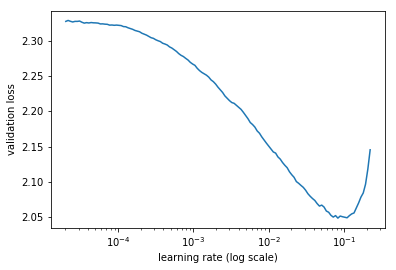

In [21]:
learn.lr_find()
learn.sched.plot()

In [22]:
%time learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.794485   1.701949   0.4051    
    1      1.70193    1.605466   0.4391                     
CPU times: user 1min 5s, sys: 35 s, total: 1min 40s
Wall time: 49.1 s


[array([1.60547]), 0.4391]

## Try to create a CNN

In [23]:
class ConvNet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(layers[i], layers[i+1], kernel_size=3, stride=2)
            for i in range(len(layers)-1)
        ])
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        for l in self.layers:
            x = F.relu(l(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [24]:
learn = ConvLearner.from_model_data(ConvNet([3,20,40, 80], 10), data)
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 15, 15]),
                           ('trainable', True),
                           ('nb_params', 560)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 20, 15, 15]),
                           ('output_shape', [-1, 40, 7, 7]),
                           ('trainable', True),
                           ('nb_params', 7240)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 40, 7, 7]),
                           ('output_shape', [-1, 80, 3, 3]),
                           ('trainable', True),
                           ('nb_params', 28880)])),
             ('AdaptiveAvgPool2d-4',
              OrderedDict([('input_shape', [-1, 80, 3, 3]),
                           ('output_shape', [-1, 80, 1, 1]),
                           ('nb_params', 0)])),
             ('Linear-5',
              OrderedDict

In [26]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.796692   1.7075     0.3732    
    1      1.683555   1.60073    0.4139                     
    2      1.567427   1.484511   0.4605                     
    3      1.47165    1.399328   0.4922                     
CPU times: user 2min 13s, sys: 1min 9s, total: 3min 23s
Wall time: 1min 39s


[array([1.39933]), 0.4922]

Accuracy has reache to 49 %

In [28]:
# nn.BatchNorm1d??

## BatchNorm
BN normalizes the data. Simple way of acheiveing this is by
subtract activatios by batch mean and divide by batch standard deviation.
We are writing our our BatchNorm but, Pytorch has inbuilt BatchNorm func. See above cell

In [39]:
class BnLayer(nn.Module):
    def __init__(self, ni, nf, stride=2, kernel_size=3):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf, kernel_size=kernel_size, stride=stride,
                              bias=False, padding=1)
        self.a = nn.Parameter(torch.zeros(nf,1,1))
        self.m = nn.Parameter(torch.ones(nf,1,1))
        
    def forward(self, x):
        x = F.relu(self.conv(x))
        x_chan = x.transpose(0,1).contiguous().view(x.size(1), -1)
        if self.training:
            self.means = x_chan.mean(1)[:,None,None]
            self.stds  = x_chan.std (1)[:,None,None]
        return (x-self.means) / self.stds *self.m + self.a

We will add these batch norm layers in CNN

In [40]:
class ConvBnNet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i + 1])
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l in self.layers: x = l(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [41]:
learn = ConvLearner.from_model_data(ConvBnNet([10, 20, 40, 80, 160], 10), data)
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 10, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 760)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('trainable', True),
                           ('nb_params', 1800)])),
             ('BnLayer-3',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-4',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 7200)])),
             ('BnLayer-5',
              OrderedDict([

In [42]:
learn.fit(3e-2, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.489036   1.35665    0.5084    
    1      1.274453   1.160159   0.5828                     


[array([1.16016]), 0.5828]

In [43]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.145077   1.030685   0.6329    
    1      1.03512    0.929231   0.6706                     
    2      0.956617   0.881522   0.6871                      
    3      0.904593   0.838265   0.7038                      
CPU times: user 2min 23s, sys: 1min 10s, total: 3min 34s
Wall time: 1min 44s


[array([0.83827]), 0.7038]

Adding multiple batch norm layers helps to improve accuracy.

In [ ]:
class ConvBnNet2(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1]) # <---- Here
            for i in range(len(layers) - 1)]) 
        self.layers2 = nn.ModuleList([BnLayer(layers[i+1], layers[i + 1], 1) # <---- Here
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2 in zip(self.layers, self.layers2):
            x = l(x)
            x = l2(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [47]:
learn = ConvLearner.from_model_data(ConvBnNet2([10, 20, 40, 80, 160], 10), data)



In [48]:
%time learn.fit(3e-2, 2)


epoch      trn_loss   val_loss   accuracy                   
    0      1.543907   1.396502   0.4943    
    1      1.275661   1.186576   0.5734                     
CPU times: user 1min 19s, sys: 37.1 s, total: 1min 56s
Wall time: 59.8 s


[array([1.18658]), 0.5734]

In [49]:
%time learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.051838   1.043213   0.6311    
    1      1.008326   0.970959   0.6562                     
CPU times: user 1min 20s, sys: 37.7 s, total: 1min 57s
Wall time: 1min


[array([0.97096]), 0.6562]

Accuracy has reached till 65%

## RESNET

prediction y = input x + f(x)
or
f(x) = y - x
y = to be predicted
x = most recently calculated
try to find functino f(x) which is equal to diff of y-x
y-x is residual error till now

### OR in other words
if we have some input x and we have a fun which predicts error.
this fun is added to output of each layer.
do this multiple times.
this helps us to reach the output 

This is based on *Boosting*

In [51]:
class ResnetLayer(BnLayer):
    def forward(self, x): return x + super().forward(x)
    
class Resnet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        # lots of layers
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [52]:
learn = ConvLearner.from_model_data(Resnet([10, 20, 40, 80, 160], 10), data)
wd=1e-5
%time learn.fit(1e-2, 2, wds=wd)


epoch      trn_loss   val_loss   accuracy                   
    0      1.646932   1.537943   0.4564    
    1      1.412616   1.271514   0.5417                     
CPU times: user 1min 31s, sys: 39.2 s, total: 2min 10s
Wall time: 1min 13s


[array([1.27151]), 0.5417]

In [53]:
%time learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.210025   1.148758   0.5869    
    1      1.148534   1.06853    0.6181                     
    2      1.02906    1.00187    0.6474                     
    3      1.04767    0.993538   0.6477                     
    4      0.952073   0.903427   0.6856                      
    5      0.846786   0.838546   0.7059                      
    6      0.815104   0.825897   0.7146                      
CPU times: user 5min 19s, sys: 2min 16s, total: 7min 36s
Wall time: 4min 15s


[array([0.8259]), 0.7146]

In [54]:
%time learn.fit(1e-2, 8, cycle_len=4, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.913056   0.87915    0.6946    
    1      0.836318   0.863738   0.7034                      
    2      0.735615   0.762365   0.7329                      
    3      0.695789   0.758402   0.7397                      
    4      0.801316   0.825686   0.7074                      
    5      0.724272   0.737208   0.7485                      
    6      0.649072   0.688643   0.7612                      
    7      0.608241   0.682502   0.7674                      
    8      0.708972   0.729234   0.7461                      
    9      0.634414   0.705822   0.7613                      
    10     0.578153   0.642842   0.7803                      
    11     0.542321   0.635735   0.7809                      
    12     0.644974   0.667513   0.7686                      
    13     0.58577    0.667482   0.7739                      
    14     0.516966   0.614866   0.7909                      
    15     0.479306   0.59

[array([0.54946]), 0.816]

81 % accuracy with ResNet